# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
%matplotlib inline

# Read Dataset

In [ ]:
# uplode csv file
from google.colab import files
uploaded = files.upload()

In [ ]:
# read csv file
df = pd.read_excel('predict_data.xlsx')

In [ ]:
# Define the path to the Excel file
file_path = r"predict_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'churn_data'

# Read the data from the specified sheet into a pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
df.head()

Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines Internet_Service  \
0                31     Deal 1           Yes             No              Yes   
1                 9     Deal 5           Yes             No              Yes   
2                28     Deal 1           Yes            Yes              Yes   
3                12        NaN           Yes             No              Yes   
4                27     Deal 2           Yes             No              Yes   

  Internet_Type Online_Security Online_Backup Device_Protection_Plan  \
0   Fiber Optic             Yes           Yes                     No   
1           DSL              No            No                    Yes   
2   Fiber Optic             Yes           Yes                    Yes   
3           DSL             Yes           Yes                    Yes   
4           DSL             Yes            No                     No   

  Premium_Support Streaming_TV Streaming_Movies Streaming_Music  \
0             Yes           No              Yes             Yes   
1              No           No               No              No   
2             Yes          Yes              Yes             Yes   
3             Yes          Yes              Yes             Yes   
4             Yes          Yes              Yes              No   

  Unlimited_Data        Contract Paperless_Billing   Payment_Method  \
0            Yes        Two Year                No  Bank Withdrawal   
1             No  Month-to-Month               Yes  Bank Withdrawal   
2             No        Two Year               Yes  Bank Withdrawal   
3            Yes        Two Year               Yes      Credit Card   
4             No        Two Year               Yes      Credit Card   

   Monthly_Charge  Total_Charges  Total_Refunds  Total_Extra_Data_Charges  \
0           95.10        6683.40           0.00                         0   
1           49.15         169.05           0.00                        10   
2          116.05        8297.50          42.57                       110   
3           84.40        5969.30           0.00                         0   
4           72.60        4084.35           0.00                       140   

   Total_Long_Distance_Charges  Total_Revenue Customer_Status Churn_Category  \
0                       631.72        7315.12          Stayed            NaN   
1                       122.37         301.42         Churned     Competitor   
2                      1872.98       10237.91          Stayed            NaN   
3                       219.39        6188.69          Stayed            NaN   
4                       332.08        4556.43          Stayed            NaN   

                    Churn_Reason  
0                            NaN  
1  Competitor had better devices  
2                            NaN  
3                            NaN  
4                            NaN

In [ ]:
df.shape

(6007, 32)

In [ ]:
df['Customer_Status'].value_counts()

Customer_Status
Stayed     4275
Churned    1732
Name: count, dtype: int64

In [ ]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [ ]:
df.head(2)

Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines Internet_Service  \
0                31     Deal 1           Yes             No              Yes   
1                 9     Deal 5           Yes             No              Yes   

  Internet_Type Online_Security Online_Backup Device_Protection_Plan  \
0   Fiber Optic             Yes           Yes                     No   
1           DSL              No            No                    Yes   

  Premium_Support Streaming_TV Streaming_Movies Streaming_Music  \
0             Yes           No              Yes             Yes   
1              No           No               No              No   

  Unlimited_Data        Contract Paperless_Billing   Payment_Method  \
0            Yes        Two Year                No  Bank Withdrawal   
1             No  Month-to-Month               Yes  Bank Withdrawal   

   Monthly_Charge  Total_Charges  Total_Refunds  Total_Extra_Data_Charges  \
0           95.10        6683.40            0.0                         0   
1           49.15         169.05            0.0                        10   

   Total_Long_Distance_Charges  Total_Revenue  Customer_Status Churn_Category  \
0                       631.72        7315.12                0            NaN   
1                       122.37         301.42                1     Competitor   

                    Churn_Reason  
0                            NaN  
1  Competitor had better devices

In [ ]:
# drop custome id
df.drop(['Customer_ID','Churn_Reason'], axis=1, inplace=True)

# Dataset Overview

##  Dataset Basic Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   object 
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   object 
 3   State                        6007 non-null   object 
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   2710 non-null   object 
 7   Phone_Service                6007 non-null   object 
 8   Multiple_Lines               6007 non-null   object 
 9   Internet_Service             6007 non-null   object 
 10  Internet_Type                4784 non-null   object 
 11  Online_Security              6007 non-null   object 
 12  Online_Backup                6007 non-null   object 
 13  Device_Protection_

It appears that some columns, such as education, age, income, and attention, need to have their data types converted to integers. Before making this change, we should first examine their unique values to ensure that the conversion is appropriate and won't result in errors or data loss.

##  Summary Statistics for Numerical Variables

In [ ]:
df.describe().T

count         mean          std    min      25%  \
Age                          6007.0    47.289163    16.805110  18.00   33.000   
Number_of_Referrals          6007.0     7.439820     4.622369   0.00    3.000   
Tenure_in_Months             6007.0    17.394540    10.592920   1.00    8.000   
Monthly_Charge               6007.0    65.087598    31.067808 -10.00   35.950   
Total_Charges                6007.0  2430.986173  2267.481294  19.10  539.950   
Total_Refunds                6007.0     2.038612     8.065520   0.00    0.000   
Total_Extra_Data_Charges     6007.0     7.015149    25.405737   0.00    0.000   
Total_Long_Distance_Charges  6007.0   797.283311   854.858841   0.00  107.085   
Total_Revenue                6007.0  3233.246021  2856.181082  21.61  833.685   
Customer_Status              6007.0     0.288330     0.453023   0.00    0.000   

                                 50%       75%       max  
Age                            47.00    60.000     84.00  
Number_of_Referrals             7.00    11.000     15.00  
Tenure_in_Months               17.00    27.000     36.00  
Monthly_Charge                 71.10    90.450    118.75  
Total_Charges                1556.85  4013.900   8684.80  
Total_Refunds                   0.00     0.000     49.79  
Total_Extra_Data_Charges        0.00     0.000    150.00  
Total_Long_Distance_Charges   470.22  1269.840   3564.72  
Total_Revenue                2367.15  5105.685  11979.34  
Customer_Status                 0.00     1.000      1.00

## Summary Statistics for Categorical Variables

In [ ]:
df.describe(include='object').T

count unique              top  freq
Gender                  6007      2           Female  3779
Married                 6007      2               No  3012
State                   6007     22    Uttar Pradesh   581
Value_Deal              2710      5           Deal 2   758
Phone_Service           6007      2              Yes  5417
Multiple_Lines          6007      2               No  3335
Internet_Service        6007      2              Yes  4784
Internet_Type           4784      3      Fiber Optic  2675
Online_Security         6007      2               No  4226
Online_Backup           6007      2               No  3846
Device_Protection_Plan  6007      2               No  3827
Premium_Support         6007      2               No  4194
Streaming_TV            6007      2               No  3582
Streaming_Movies        6007      2               No  3545
Streaming_Music         6007      2               No  3792
Unlimited_Data          6007      2              Yes  4134
Contract                6007      3   Month-to-Month  2919
Paperless_Billing       6007      2              Yes  3614
Payment_Method          6007      3  Bank Withdrawal  3415
Churn_Category          1732      5       Competitor   761

In [ ]:
def grab_col_names(df):
    # Separate columns into categorical and numerical
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    print(f'cat_col: {len(categorical_cols)}')
    print(f'num_col: {len(numerical_cols)}')

    return categorical_cols, numerical_cols

In [ ]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {categorical_cols}')
    print('-' * 80)
    print(f'Numerical : {numerical_cols}')


categorical_cols, numerical_cols = grab_col_names(df)
identify_check(df)

cat_col: 20
num_col: 10
--------------------------------------------------------------------------------
Categorical : Index(['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Churn_Category'],
      dtype='object')
--------------------------------------------------------------------------------
Numerical : Index(['Age', 'Number_of_Referrals', 'Tenure_in_Months', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')


In [ ]:
# find unqie value and number of uniqe values in categorical culomns
for col in categorical_cols:
  print(col,':',df[col].nunique())
  print(col,':',df[col].unique())
  print('-'*50)


Gender : 2
Gender : ['Female' 'Male']
--------------------------------------------------
Married : 2
Married : ['Yes' 'No']
--------------------------------------------------
State : 22
State : ['Madhya Pradesh' 'Punjab' 'West Bengal' 'Maharashtra' 'Tamil Nadu'
 'Jammu & Kashmir' 'Uttarakhand' 'Haryana' 'Uttar Pradesh' 'Rajasthan'
 'Andhra Pradesh' 'Karnataka' 'Telangana' 'Kerala' 'Delhi' 'Gujarat'
 'Puducherry' 'Bihar' 'Assam' 'Jharkhand' 'Odisha' 'Chhattisgarh']
--------------------------------------------------
Value_Deal : 5
Value_Deal : ['Deal 1' 'Deal 5' nan 'Deal 2' 'Deal 3' 'Deal 4']
--------------------------------------------------
Phone_Service : 2
Phone_Service : ['Yes' 'No']
--------------------------------------------------
Multiple_Lines : 2
Multiple_Lines : ['No' 'Yes']
--------------------------------------------------
Internet_Service : 2
Internet_Service : ['Yes' 'No']
--------------------------------------------------
Internet_Type : 3
Internet_Type : ['Fiber Optic'

# Data Cleaning

In [ ]:
# # # percantage of null values in dataset decanding order
# df.isnull().mean().sort_values(ascending=False)

# EDA

For our **Exploratory Data Analysis** (EDA), we'll take it in two main steps:

1. **Univariate Analysis**: Here, we'll focus on one feature at a time to understand its distribution and range.

2. **Bivariate Analysis**: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: **predicting the target variable**.

## Univariate Analysis

We undertake univariate analysis on the dataset's features, based on their datatype:

  - For **numerical data**: We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.
  - For **categorical data**: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.
By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

### Numerical Variables Univariate Analysis

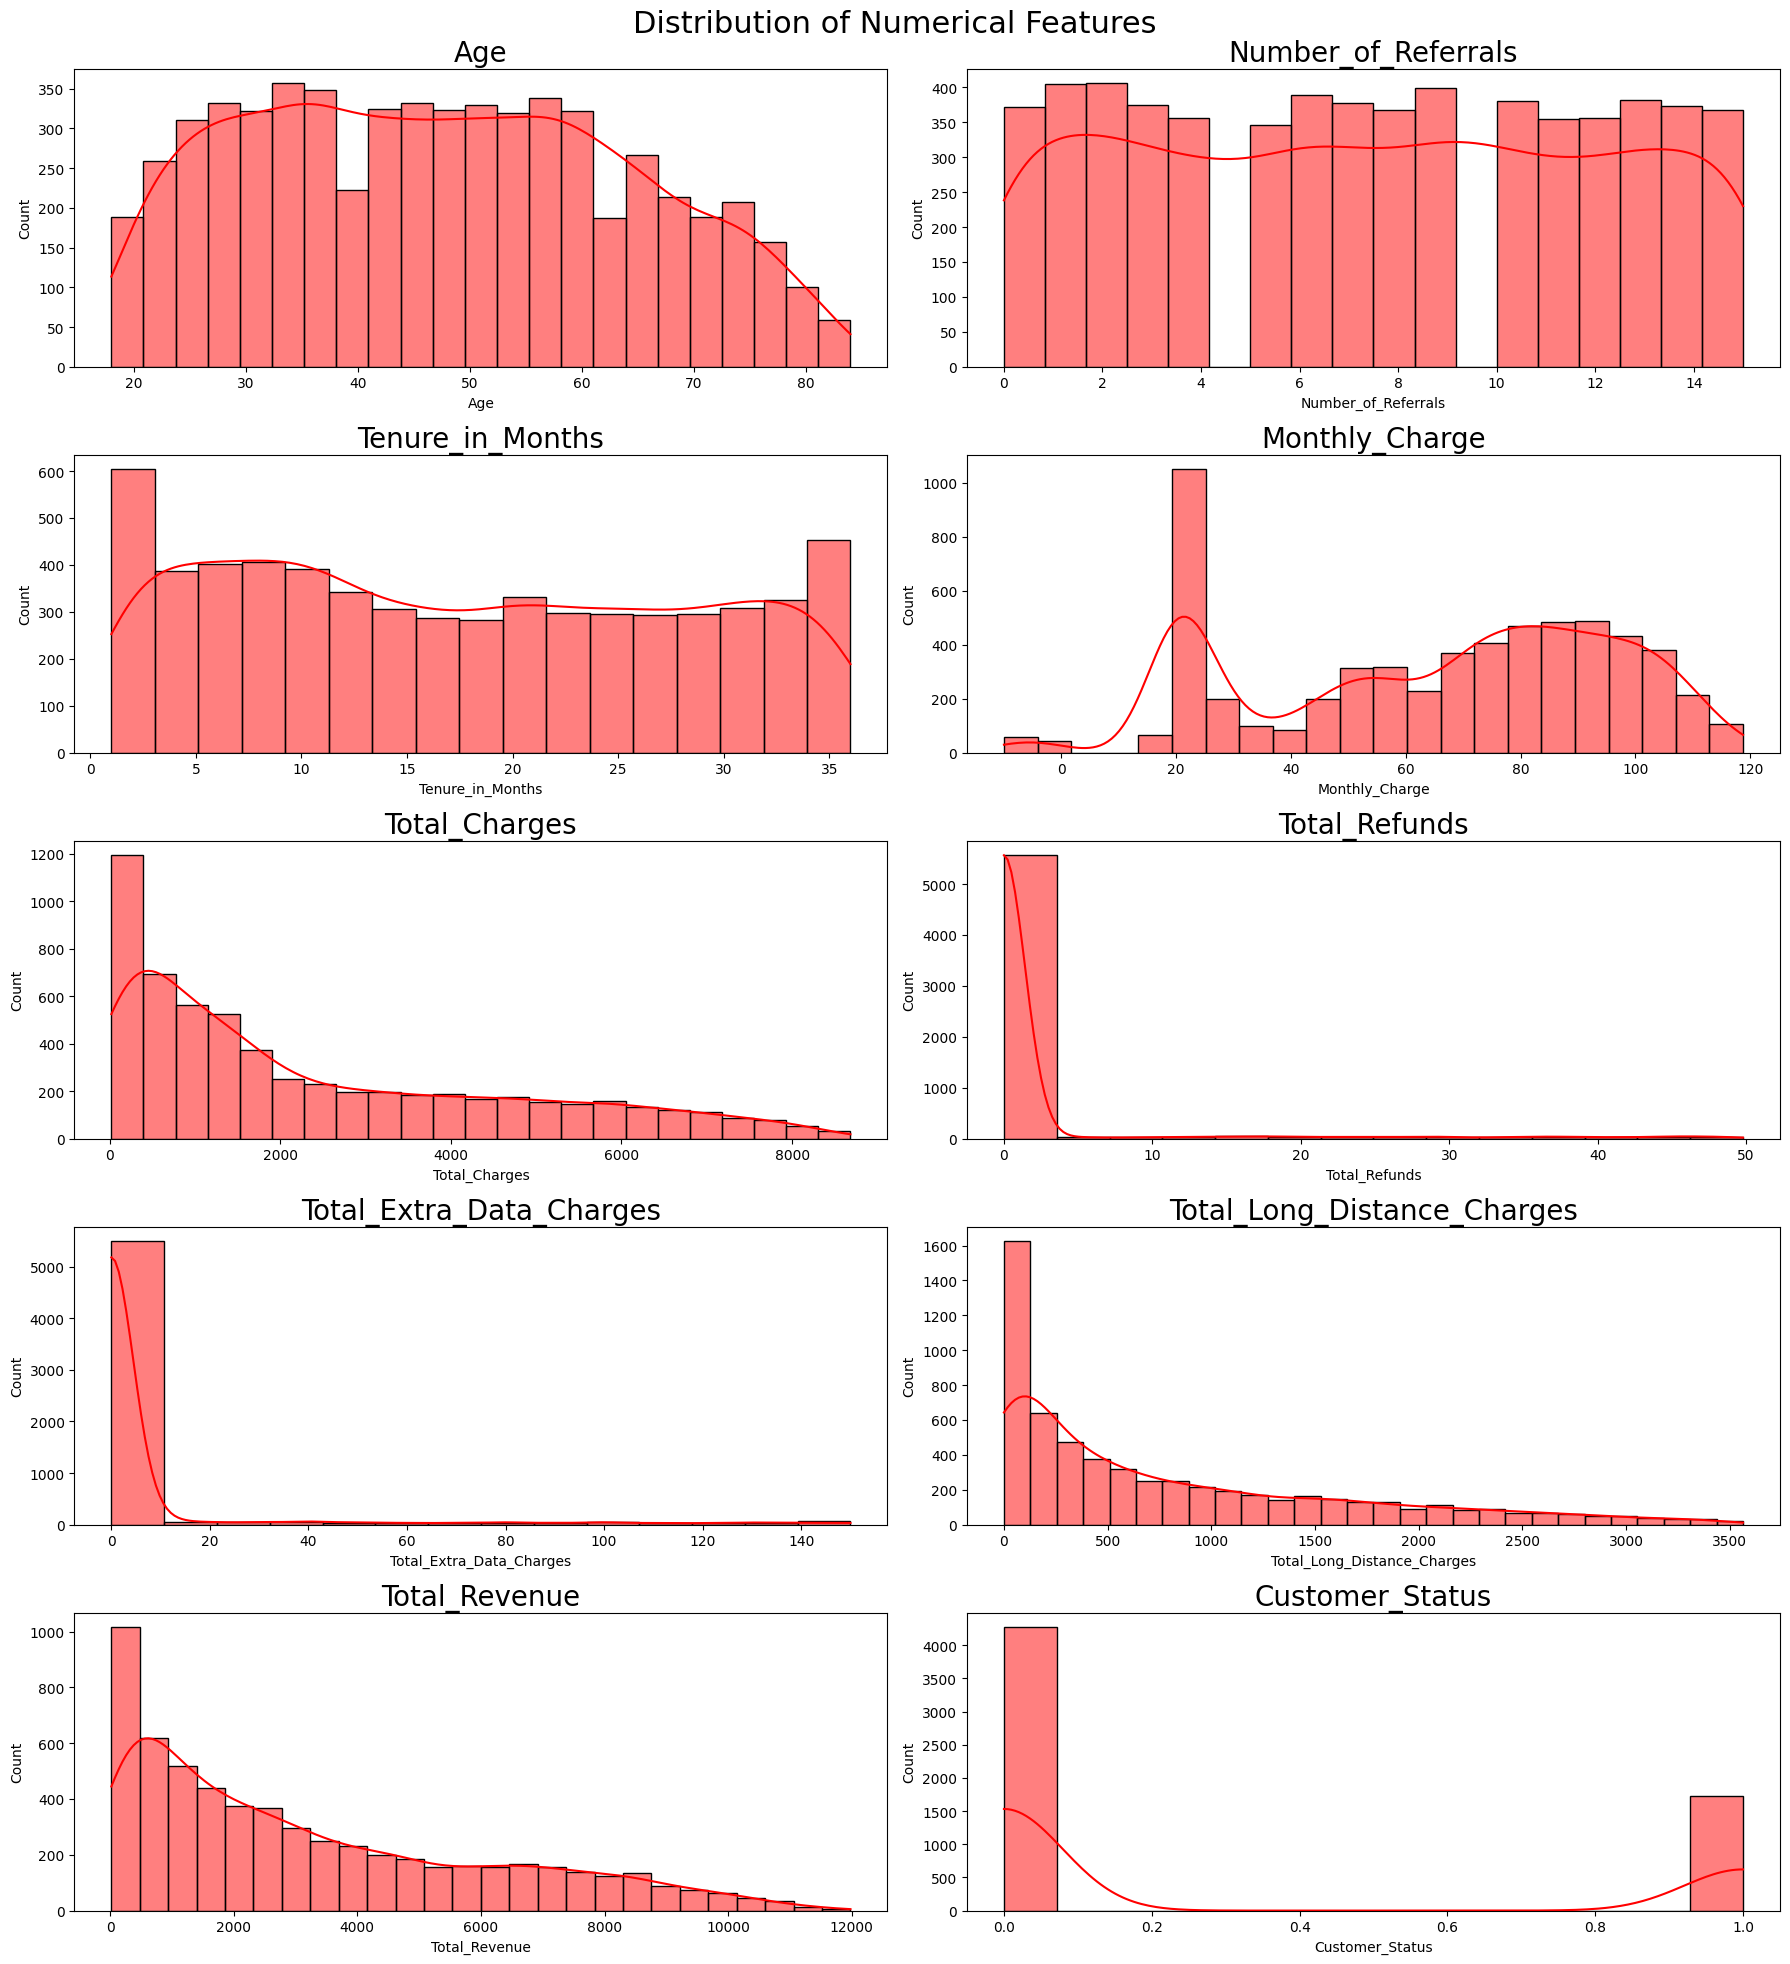

In [ ]:
# Set up the subplot for a 3x2 layout
numerical_features = [col for col in df.columns if df[col].dtype != 'O']

#Calculate the number of rows and columns needed for the subplots
num_rows = int(np.ceil(len(numerical_features) / 2))  # Calculate rows dynamically
num_cols = 2

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 20))  # Adjust grid

# Loop to plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // num_cols  # Update row calculation
    col_idx = i % num_cols

    # Plot histogram with KDE
    sns.histplot(df[feature], kde=True, ax=ax[row, col_idx], color='red')

    ax[row, col_idx].set_title(f'{feature}', fontsize=20)

# Hide any unused subplots (if any)
# No need for this part as we calculated rows and cols dynamically

plt.suptitle('Distribution of Numerical Features', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Categorical Variables Univariate Analysis

In [ ]:
# Filter out categorical features for the univariate analysis
categorical_features =  [col for col in df.columns if df[col].dtype == 'O']

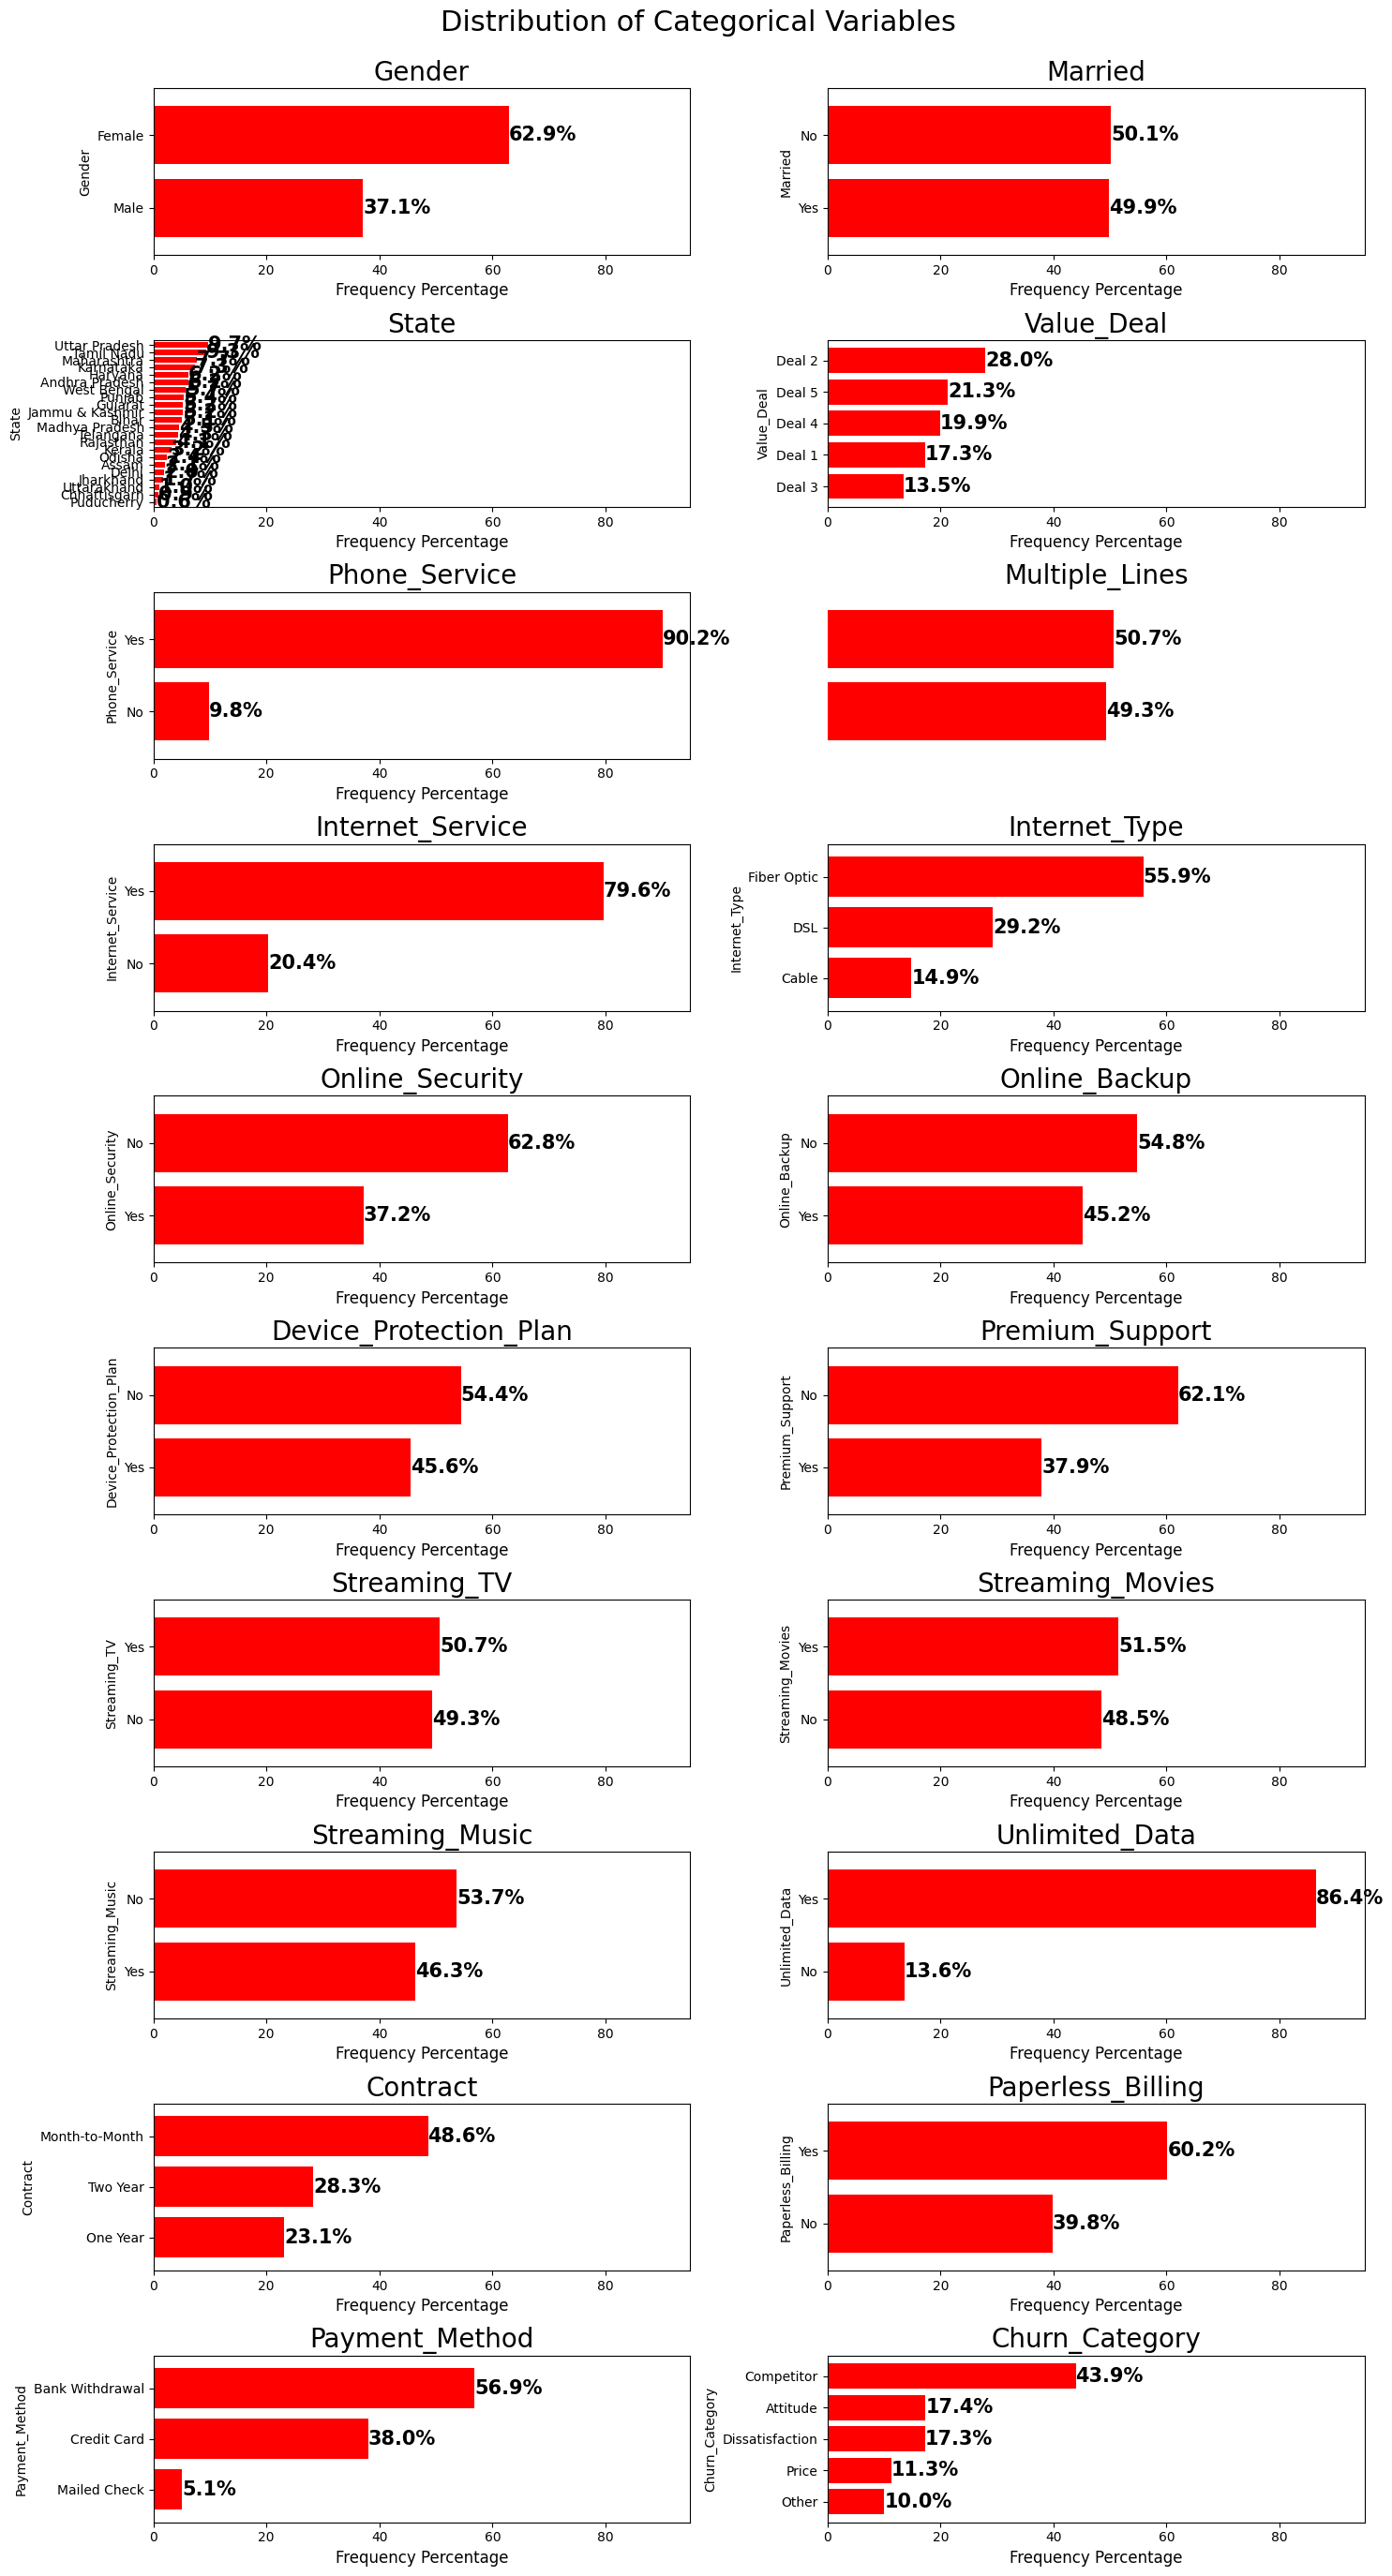

In [ ]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(15, 28))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[2,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Bivariate Analysis

### Numerical Features vs Target

I am going to visualize each numerical feature against the target using two types of charts:

Boxplot and Hexbin Plot

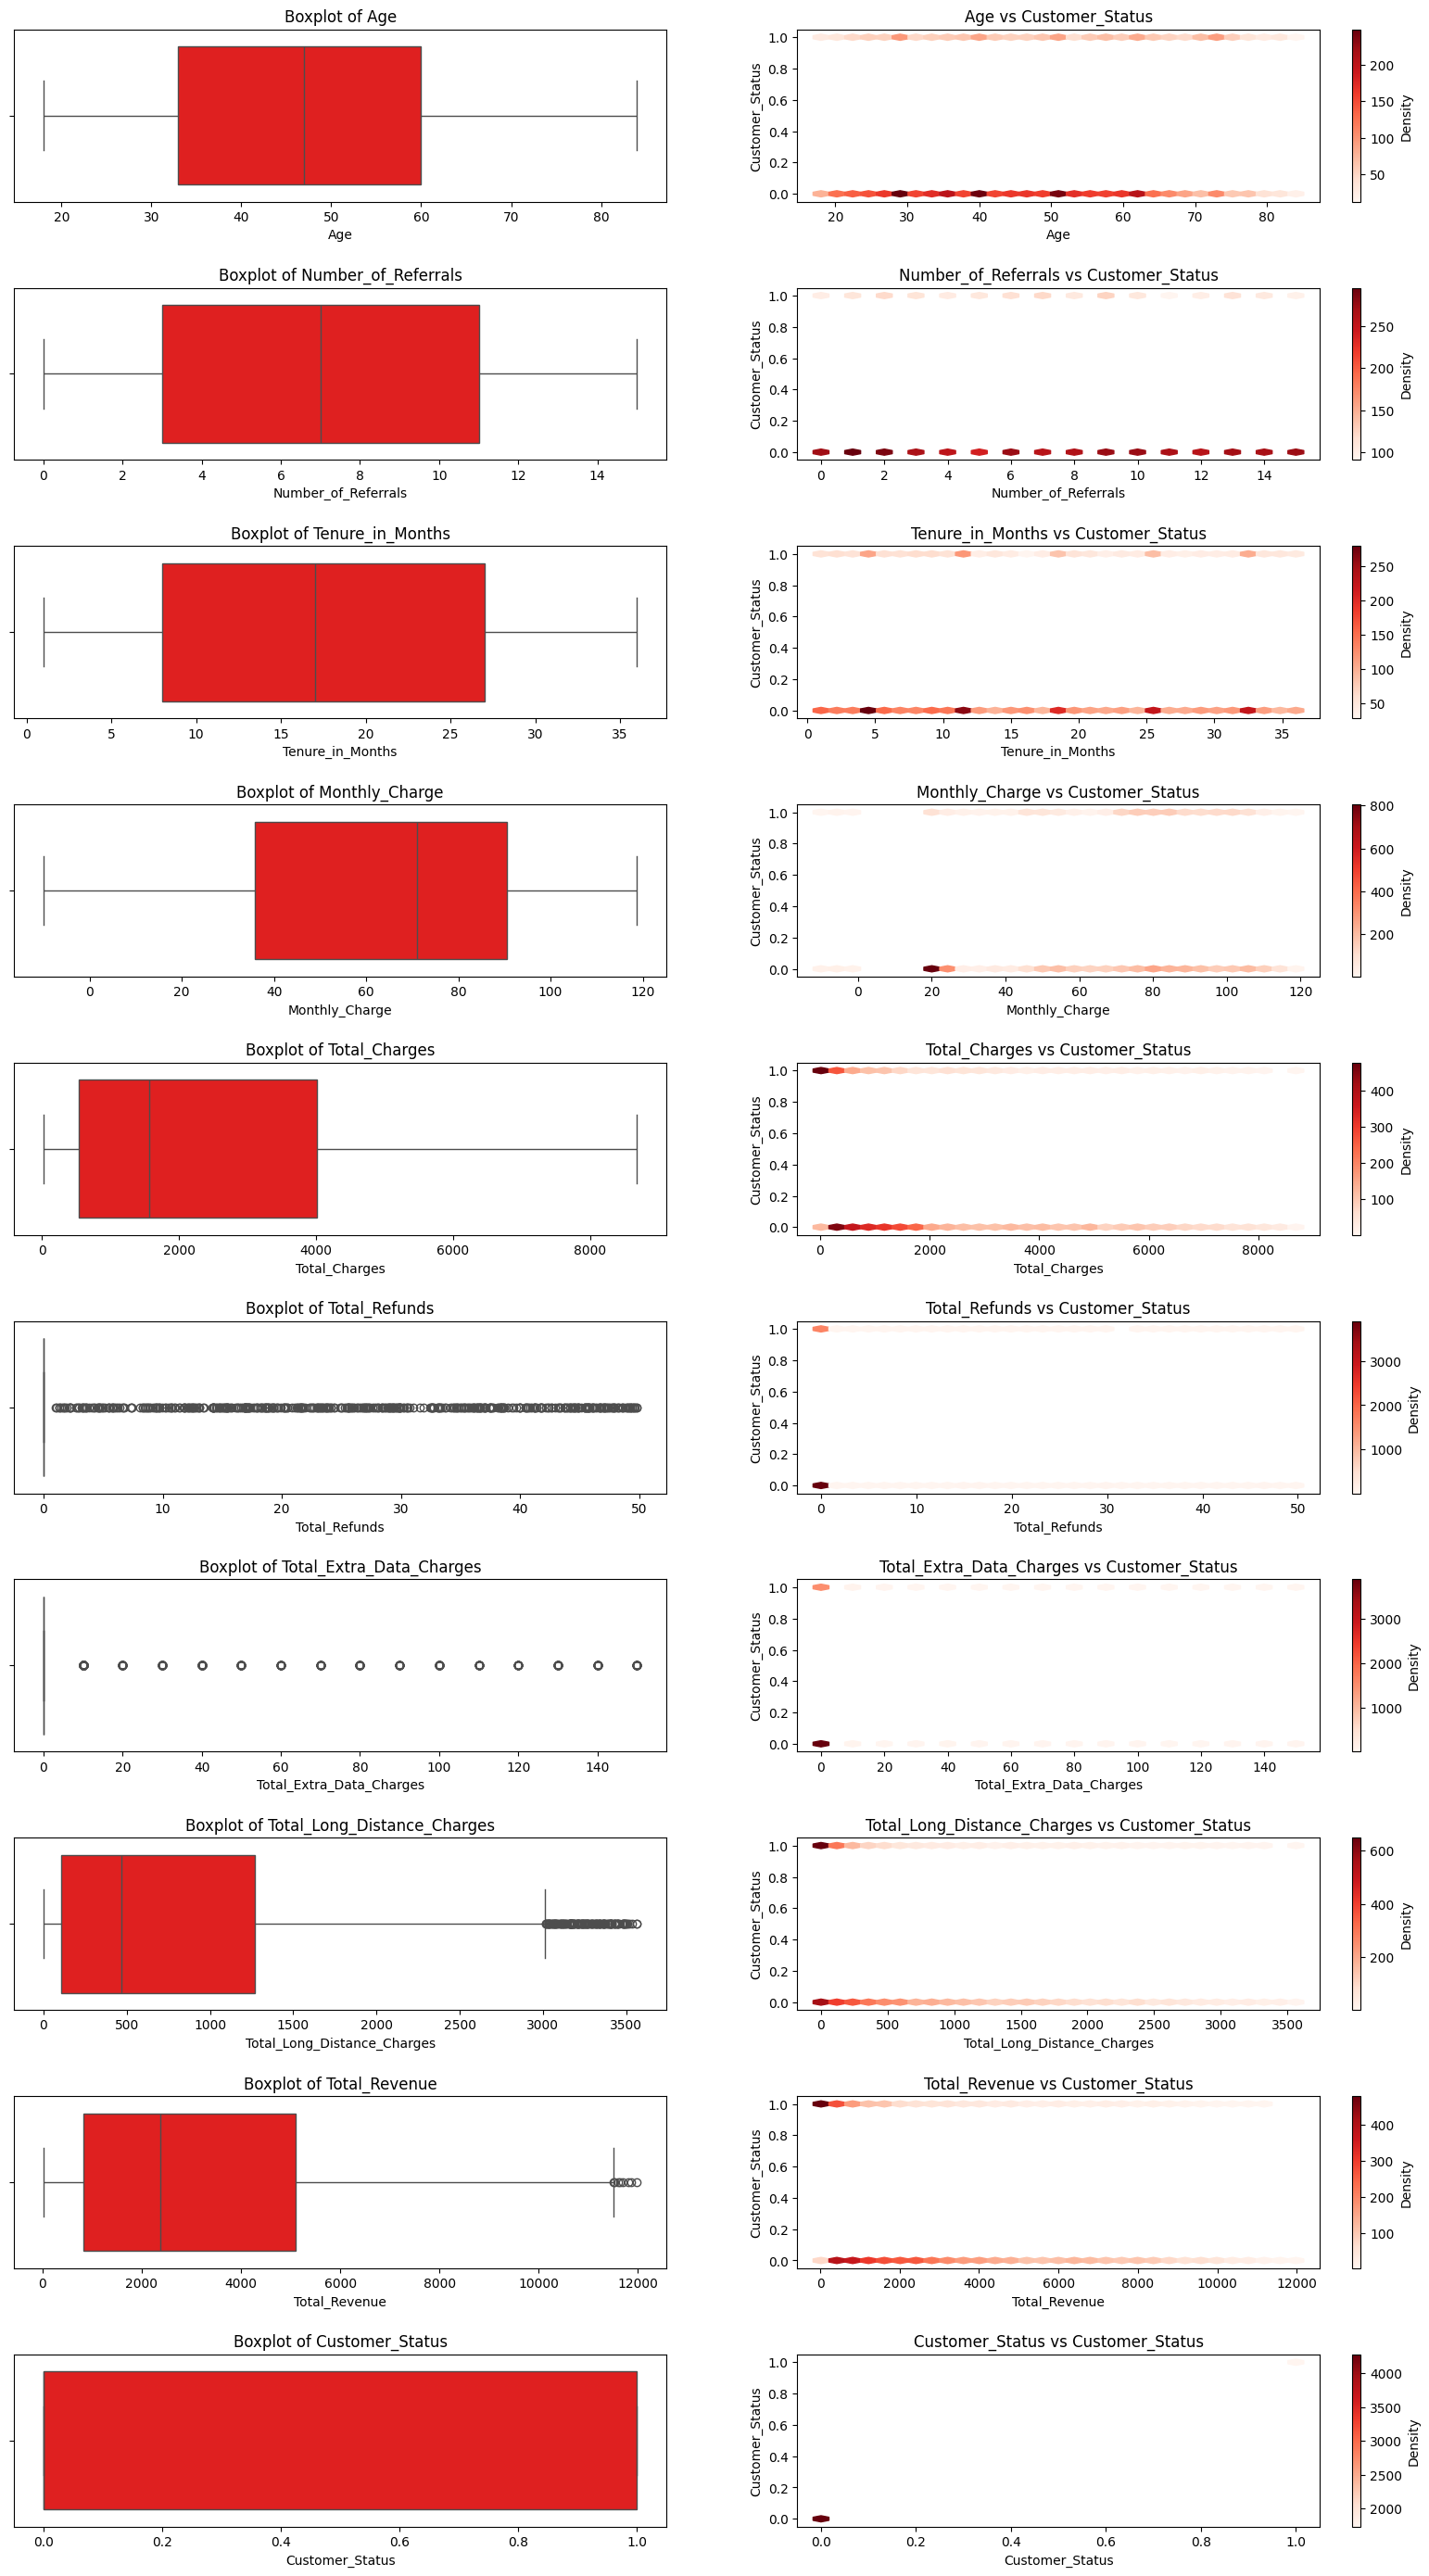

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(len(numerical_features), 2, figsize=(20, 35))
plt.subplots_adjust(hspace=0.5)

for i in range(len(numerical_features)):

    sns.boxplot(x=numerical_features[i], data=df, ax=ax[i, 0], color='red')
    ax[i, 0].set_title(f"Boxplot of {numerical_features[i]}")

    hb = ax[i, 1].hexbin(
        df[numerical_features[i]],
        df['Customer_Status'],
        gridsize=30,
        cmap="Reds",
        mincnt=1
    )
    cb = fig.colorbar(hb, ax=ax[i, 1])
    cb.set_label("Density")
    ax[i, 1].set_title(f"{numerical_features[i]} vs Customer_Status")
    ax[i, 1].set_xlabel(numerical_features[i])
    ax[i, 1].set_ylabel('Customer_Status')


plt.show()

<ipython-input-21-3781a96f7d52>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
<ipython-input-21-3781a96f7d52>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')


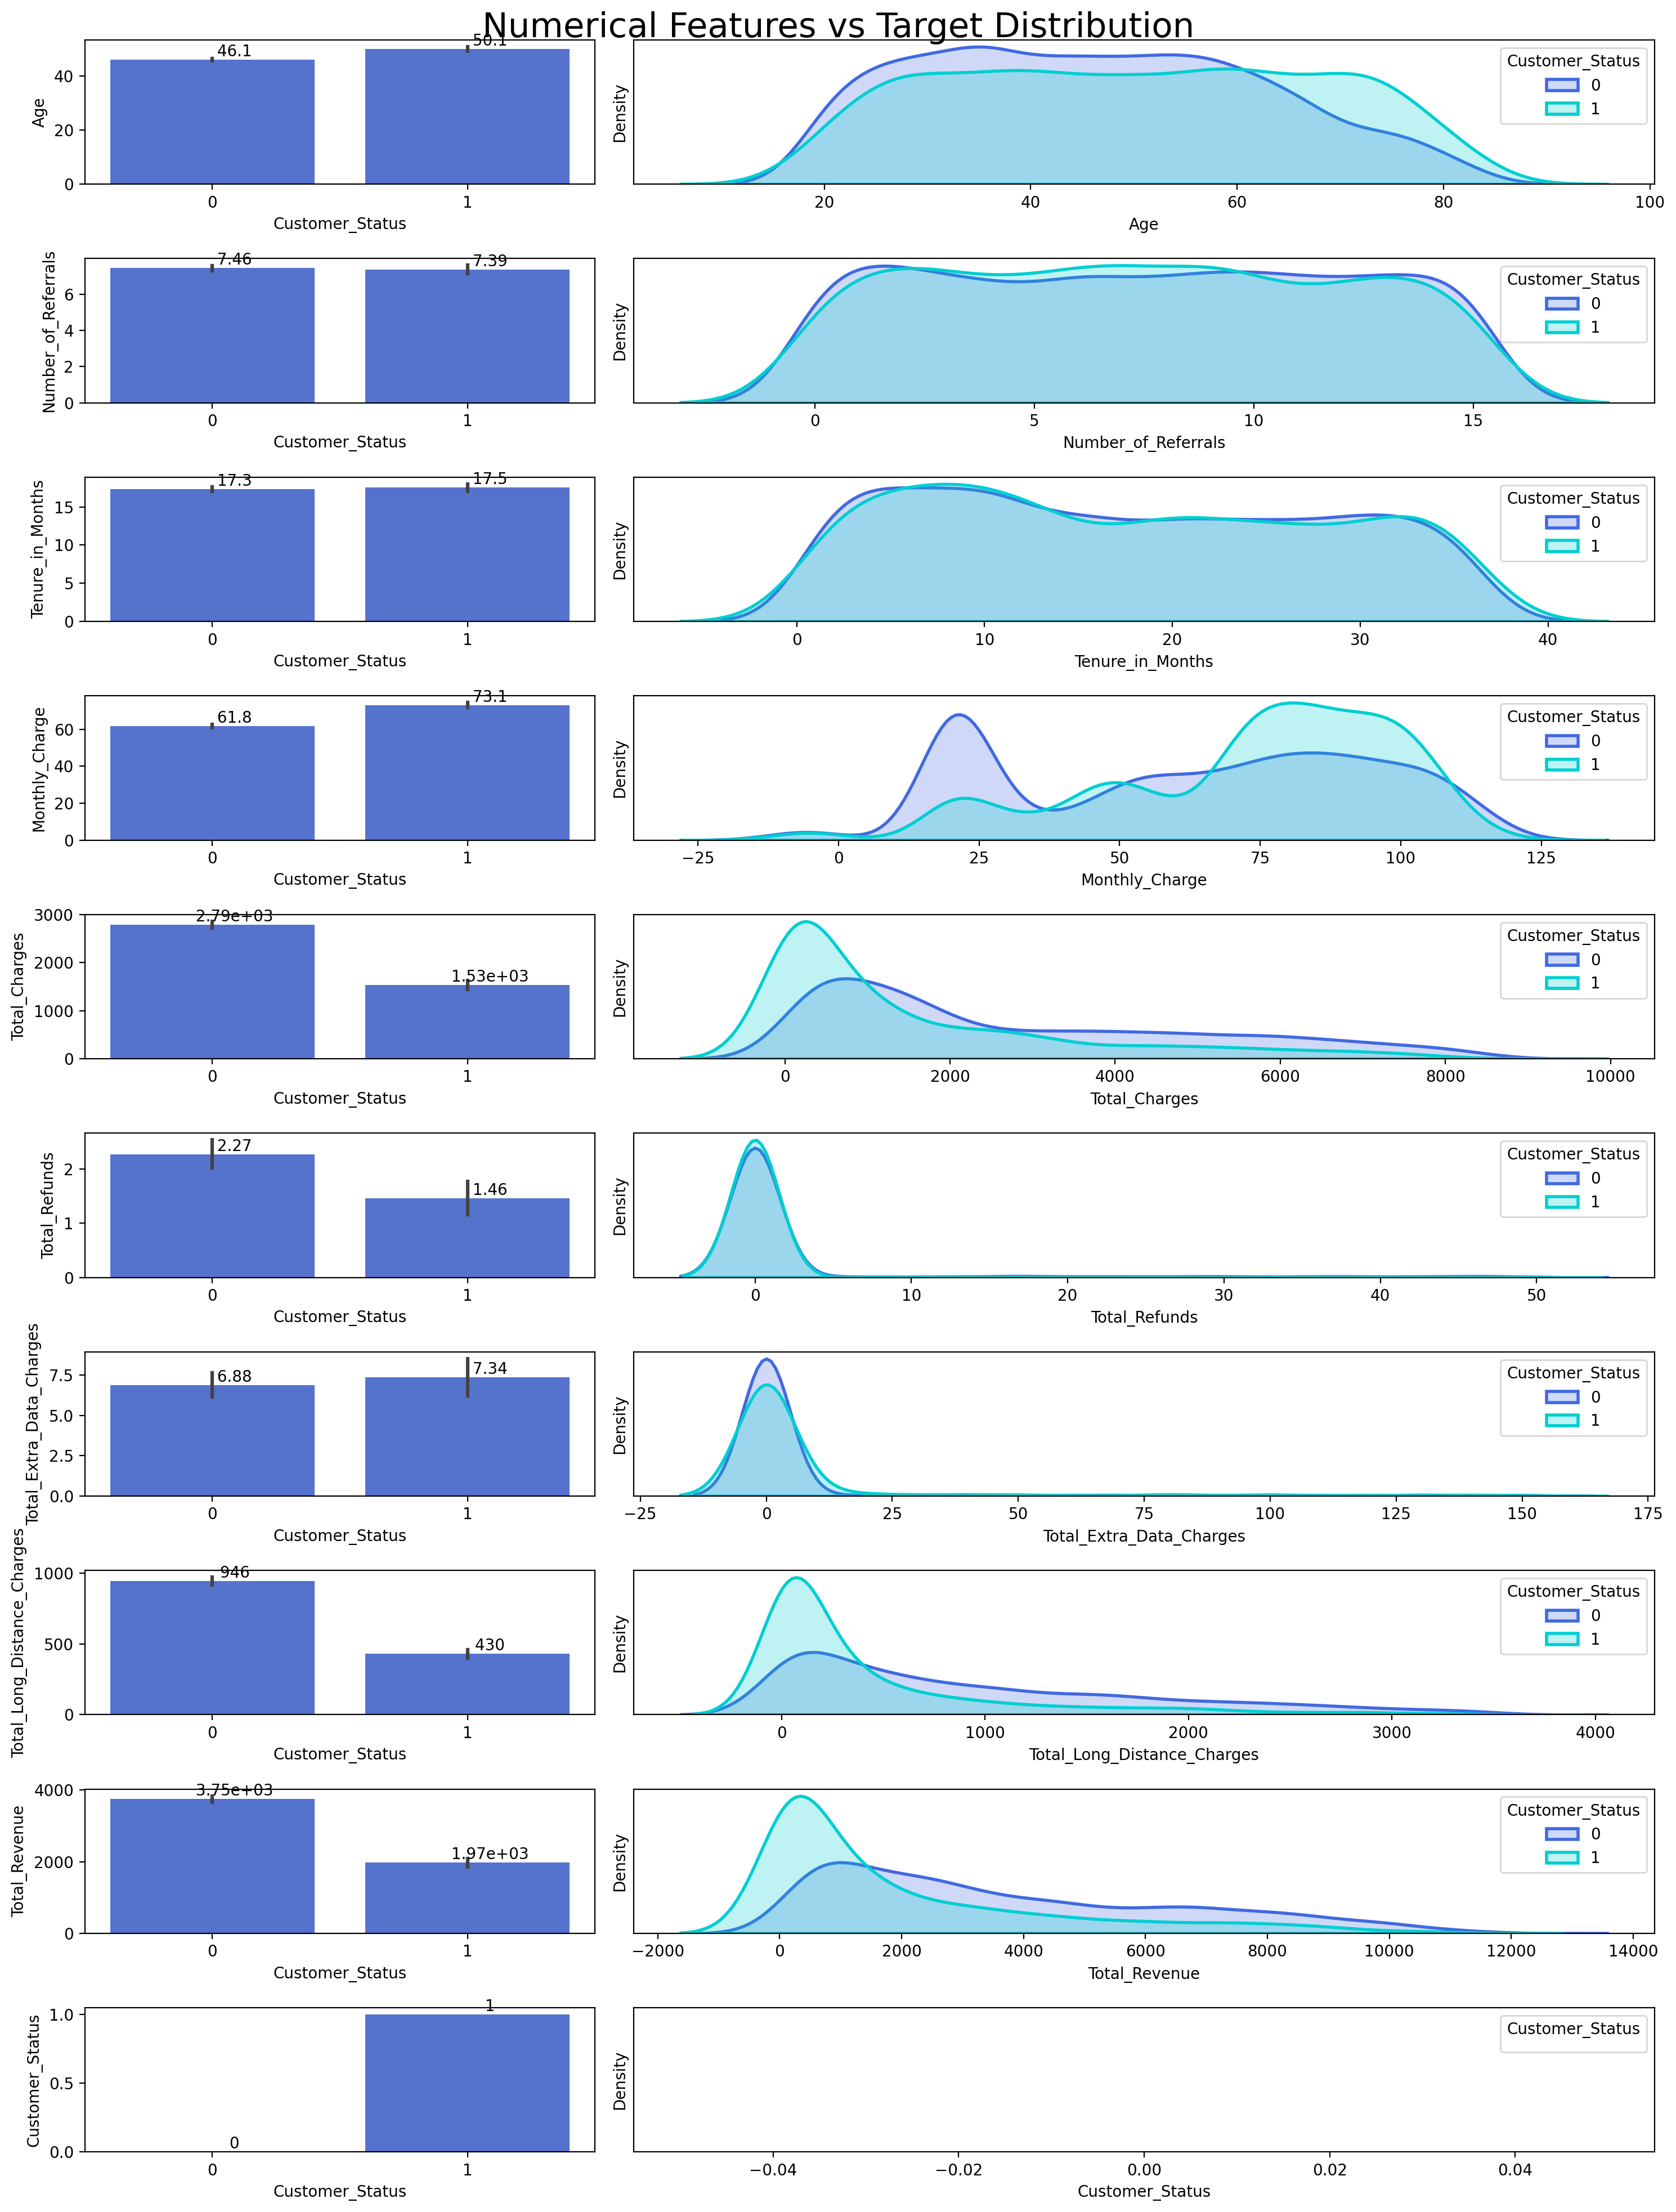

In [ ]:
# Define a list containing the names of important numerical features in the dataset
#Num_Features = ['total_unique_event','total_distance','attention','education','age','income','year','month','day','hour']

sns.set_palette(['royalblue', 'darkturquoise'])

Target = 'Customer_Status'
fig, ax = plt.subplots(10, 2, figsize=(15,20), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(numerical_features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df[df[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Customer_Status', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

### Categorical Features vs ad_clicked Stacked Barplots

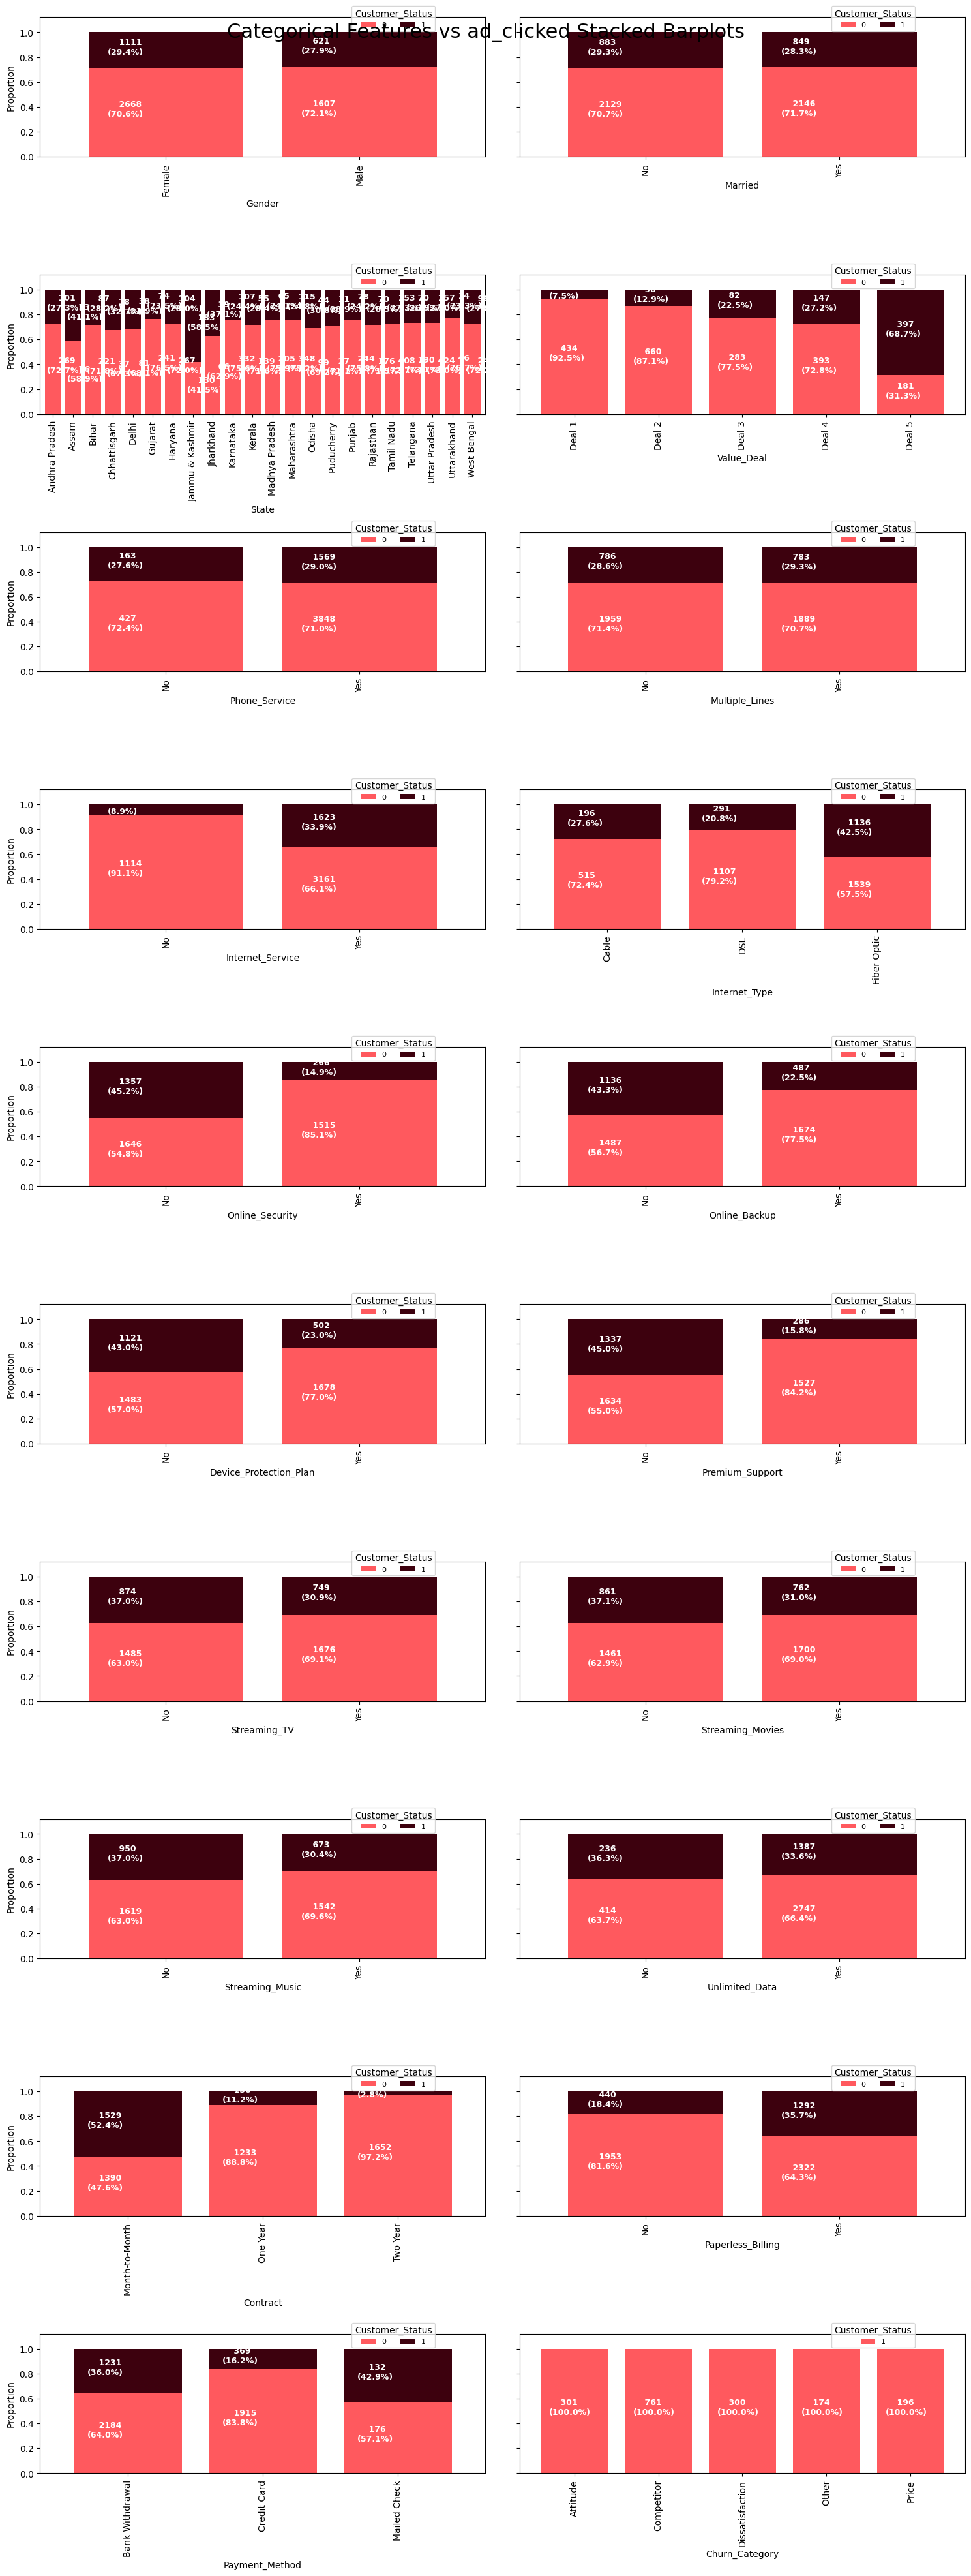

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(15,40)) # Changed nrows to 4 to accommodate 7 features

for i,col in enumerate(categorical_features):
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['Customer_Status'])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['Customer_Status'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff595e','#3d010e'])

    # Plot the cross tabulation as a stacked bar chart
    x, y = i//2, i%2
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "white", fontsize=9, fontweight="bold")

    # Add legend
    ax[x,y].legend(title='Customer_Status', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=90)


# Turn off extra subplots if needed
if len(categorical_features) < 8:  # Adjust condition as needed
    for i in range(len(categorical_features), 8): # Turn off unused axes
        ax[i // 2, i % 2].axis('off')

plt.suptitle('Categorical Features vs ad_clicked Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

In [ ]:
df.head(1)

Gender  Age Married  State  Number_of_Referrals  Tenure_in_Months  \
0   Male   35      No  Delhi                    7                27   

  Value_Deal Phone_Service Multiple_Lines Internet_Service Internet_Type  \
0        NaN           Yes             No              Yes         Cable   

  Online_Security Online_Backup Device_Protection_Plan Premium_Support  \
0              No           Yes                     No             Yes   

  Streaming_TV Streaming_Movies Streaming_Music Unlimited_Data  Contract  \
0          Yes               No              No            Yes  One Year   

  Paperless_Billing Payment_Method  Monthly_Charge  Total_Charges  \
0               Yes    Credit Card            65.6          593.3   

   Total_Refunds  Total_Extra_Data_Charges  Total_Long_Distance_Charges  \
0            0.0                         0                       381.51   

   Total_Revenue  Customer_Status Churn_Category  
0         974.81                0            NaN

I am going to check for outliers using the IQR method for the numerical features:

# Outliers

In [ ]:
# drop ad_clicked from numerical_features

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Age                              0
Number_of_Referrals              0
Tenure_in_Months                 0
Monthly_Charge                   0
Total_Charges                    0
Total_Refunds                  462
Total_Extra_Data_Charges       614
Total_Long_Distance_Charges    130
Total_Revenue                    8
Customer_Status                  0
dtype: int64

In [ ]:
# Remove outliers based on the IQR rule
filtered_data = final_data[
    ~((final_data[numerical_features] < (Q1 - 1.5 * IQR)) |
      (final_data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
]
print(f"Original data shape: {final_data.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

Original data shape: (2501, 21)
Filtered data shape: (1816, 21)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head(1)

Gender  Age Married  State  Number_of_Referrals  Tenure_in_Months  \
0   Male   35      No  Delhi                    7                27   

  Value_Deal Phone_Service Multiple_Lines Internet_Service Internet_Type  \
0        NaN           Yes             No              Yes         Cable   

  Online_Security Online_Backup Device_Protection_Plan Premium_Support  \
0              No           Yes                     No             Yes   

  Streaming_TV Streaming_Movies Streaming_Music Unlimited_Data  Contract  \
0          Yes               No              No            Yes  One Year   

  Paperless_Billing Payment_Method  Monthly_Charge  Total_Charges  \
0               Yes    Credit Card            65.6          593.3   

   Total_Refunds  Total_Extra_Data_Charges  Total_Long_Distance_Charges  \
0            0.0                         0                       381.51   

   Total_Revenue  Customer_Status Churn_Category  
0         974.81                0            NaN

we do not want to use 'age', 'income','education','gender','attention' in our dataset for modeling then we drop these featurs

After analyzing the dataset, we can categorize the features into three groups:

- **No Encoding Needed**: These are the features that do not require any form of encoding because they are already in a numerical format that can be fed into a model.
- **One-Hot Encoding**: This is required for nominal variables, which are categorical variables without any intrinsic order. One-hot encoding converts each unique value of the feature into a separate column with a 1 or 0, indicating the presence of that value.
- **Label Encoding**: This is used for ordinal variables, which are categorical variables with a meaningful order. Label encoding assigns a unique integer to each category in the feature, maintaining the order of the values.

By categorizing the features into these groups, we can apply the appropriate encoding method to each feature, preparing the dataset for modeling.

In [ ]:
df.head(1)

Gender  Age Married  State  Number_of_Referrals  Tenure_in_Months  \
0   Male   35      No  Delhi                    7                27   

  Value_Deal Phone_Service Multiple_Lines Internet_Service Internet_Type  \
0        NaN           Yes             No              Yes         Cable   

  Online_Security Online_Backup Device_Protection_Plan Premium_Support  \
0              No           Yes                     No             Yes   

  Streaming_TV Streaming_Movies Streaming_Music Unlimited_Data  Contract  \
0          Yes               No              No            Yes  One Year   

  Paperless_Billing Payment_Method  Monthly_Charge  Total_Charges  \
0               Yes    Credit Card            65.6          593.3   

   Total_Refunds  Total_Extra_Data_Charges  Total_Long_Distance_Charges  \
0            0.0                         0                       381.51   

   Total_Revenue  Customer_Status Churn_Category  
0         974.81                0            NaN

No Encoding Needed:

The following features do not require any encoding as they are either numerical, binary, or ordinal variables that have already been encoded as numbers:
- total_movements: This is a numerical variable.
- movement_distance: This is a numerical variable.
- ad_clicked: This is Target and a numerical variable.
- total_evenet: This is a numerical variable.
- total_unique_event: This is a numerical variable.
- year: This is a numerical variable.
- month: This is a numerical variable.
- day: This is a numerical variable.
- hour: This is a numerical variable.


One-Hot Encoding:

The following features are nominal variables and should be one-hot encoded:
- country: This is a nominal variable.
- ad_position: This is a nominal variable.
- ad_type: This is a nominal variable.
- ad_category: This is a nominal variable.



In [ ]:
# List of columns to be label encoded
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method', 'Churn_Category'

]

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
df.head()

Gender  Age  Married  State  Number_of_Referrals  Tenure_in_Months  \
0       0   30        1     11                    0                31   
1       1   51        0     15                    5                 9   
2       0   43        1     21                    3                28   
3       1   35        0     12                   10                12   
4       1   75        1     17                   12                27   

   Value_Deal  Phone_Service  Multiple_Lines  Internet_Service  Internet_Type  \
0           0              1               0                 1              2   
1           4              1               0                 1              1   
2           0              1               1                 1              2   
3           5              1               0                 1              1   
4           1              1               0                 1              1   

   Online_Security  Online_Backup  Device_Protection_Plan  Premium_Support  \
0                1              1                       0                1   
1                0              0                       1                0   
2                1              1                       1                1   
3                1              1                       1                1   
4                1              0                       0                1   

   Streaming_TV  Streaming_Movies  Streaming_Music  Unlimited_Data  Contract  \
0             0                 1                1               1         2   
1             0                 0                0               0         0   
2             1                 1                1               0         2   
3             1                 1                1               1         2   
4             1                 1                0               0         2   

   Paperless_Billing  Payment_Method  Monthly_Charge  Total_Charges  \
0                  0               0           95.10        6683.40   
1                  1               0           49.15         169.05   
2                  1               0          116.05        8297.50   
3                  1               1           84.40        5969.30   
4                  1               1           72.60        4084.35   

   Total_Refunds  Total_Extra_Data_Charges  Total_Long_Distance_Charges  \
0           0.00                         0                       631.72   
1           0.00                        10                       122.37   
2          42.57                       110                      1872.98   
3           0.00                         0                       219.39   
4           0.00                       140                       332.08   

   Total_Revenue  Customer_Status  Churn_Category  
0        7315.12                0               5  
1         301.42                1               1  
2       10237.91                0               5  
3        6188.69                0               5  
4        4556.43                0               5

In [ ]:
df.shape

(6007, 30)

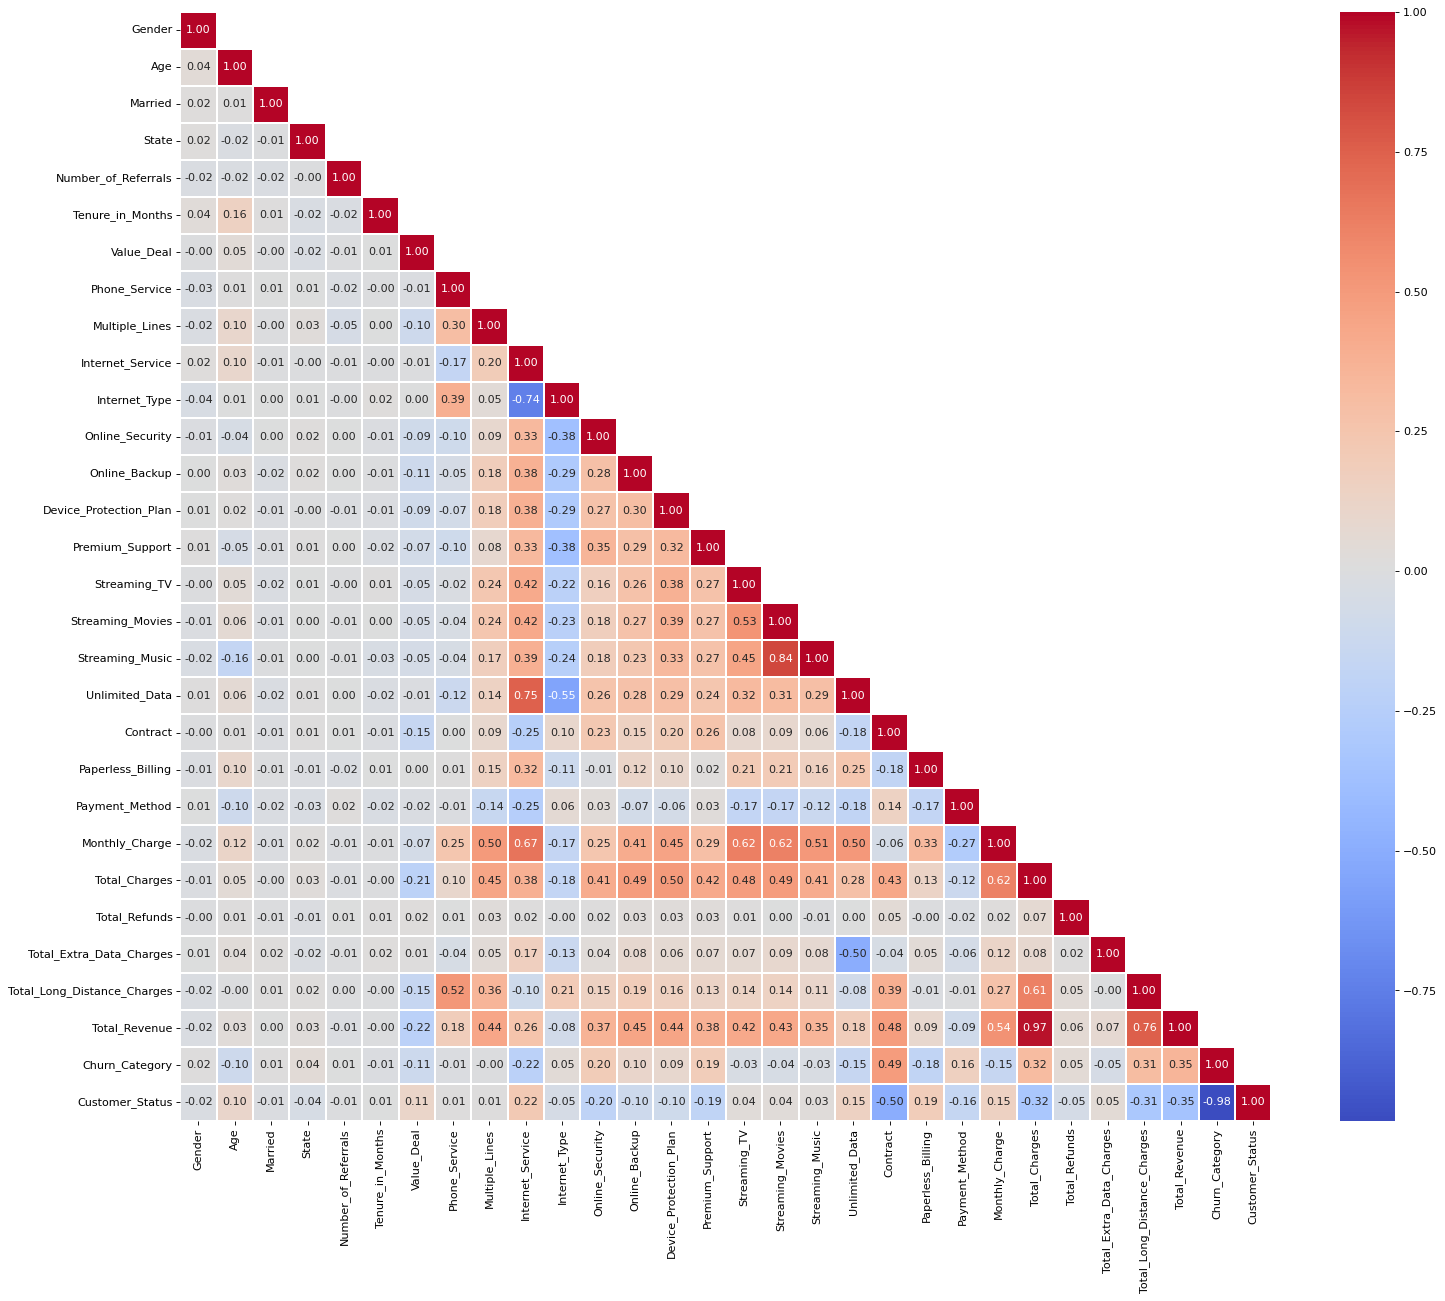

In [ ]:
# Calculation of the Spearman correlation
target = 'Customer_Status'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(22,18), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)
plt.show()

In [ ]:
# remove total_distance
df.drop(['Churn_Category'], axis=1, inplace=True)

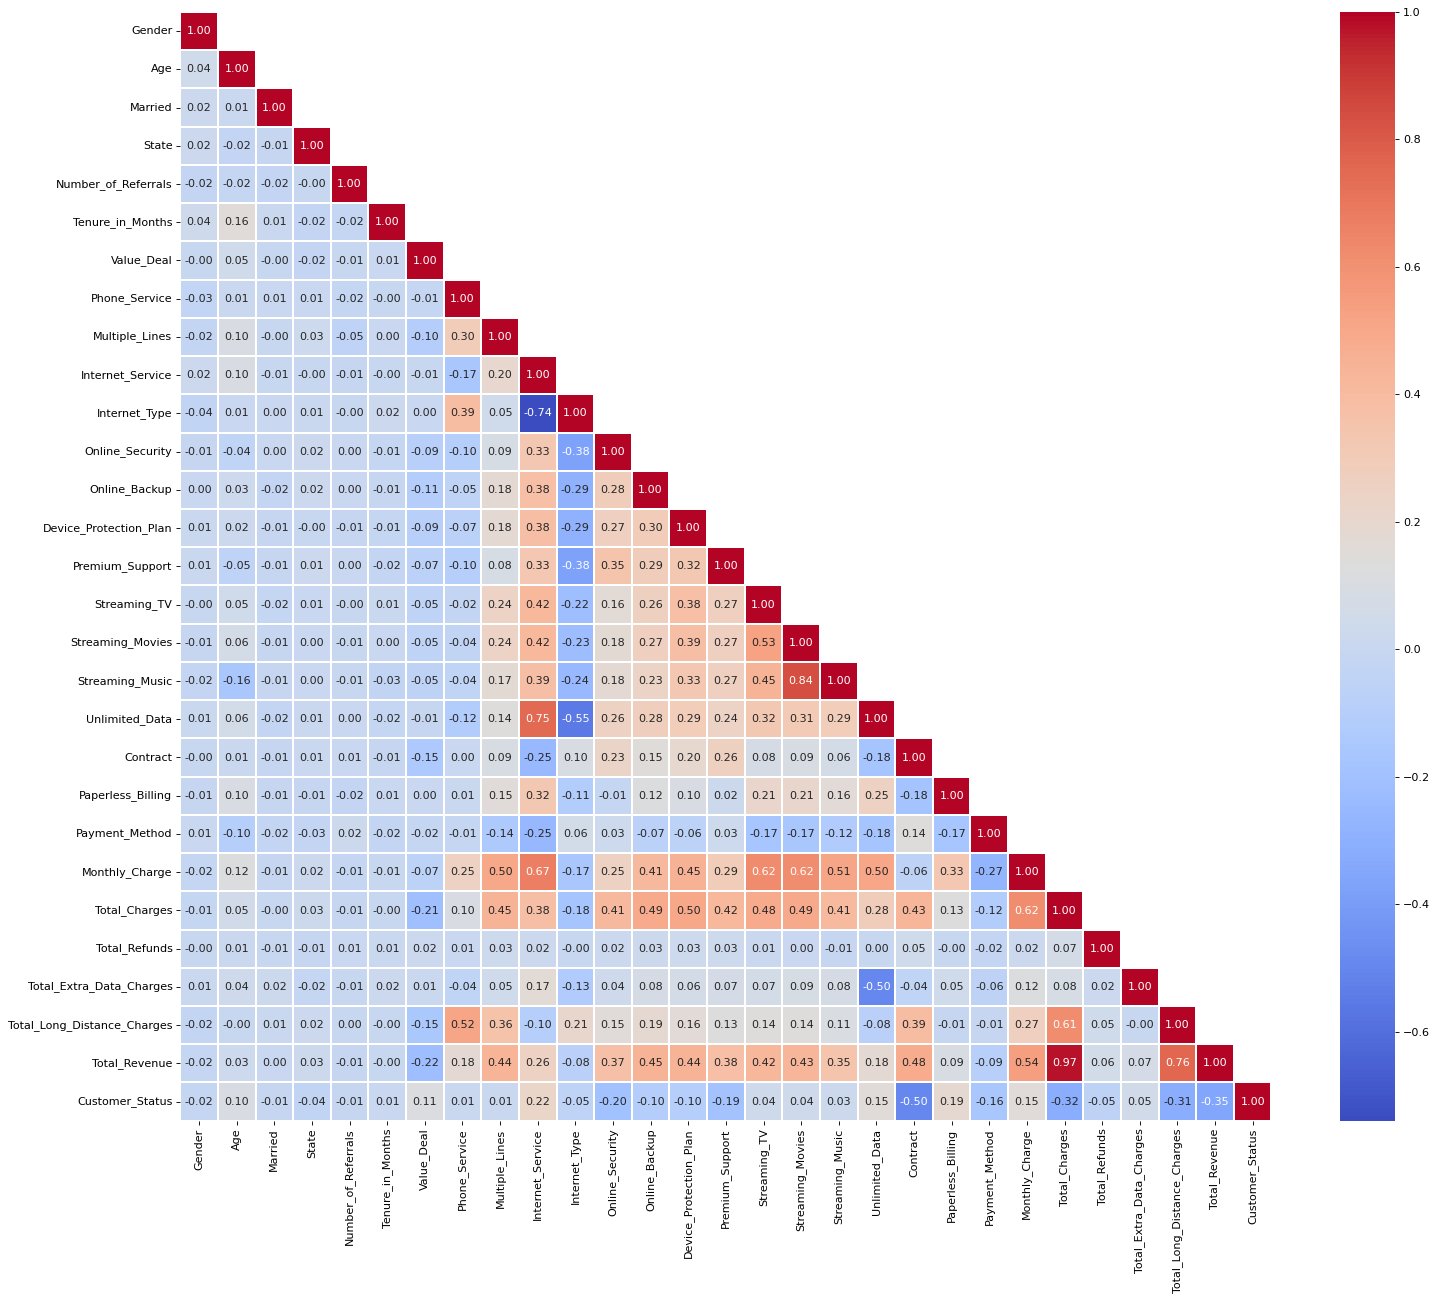

In [ ]:
# Calculation of the Spearman correlation
target = 'Customer_Status'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(22,18), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)
plt.show()

# --

# Train Test Split

First, it is essential to define the features (X) and the target labels (y) in the dataset. X is a DataFrame that holds the feature values for all observations, while y is a Series containing the categorical labels associated with each observation.

In [ ]:
df.head()

Gender  Age  Married  State  Number_of_Referrals  Tenure_in_Months  \
0       1   35        0      4                    7                27   
1       0   45        1     12                   14                13   
2       1   51        0     21                    4                35   
3       1   79        0      9                    3                21   
4       0   80        0     17                    3                 8   

   Value_Deal  Phone_Service  Multiple_Lines  Internet_Service  Internet_Type  \
0           5              1               0                 1              0   
1           5              1               1                 1              0   
2           4              1               0                 1              2   
3           3              1               0                 1              2   
4           5              1               0                 1              2   

   Online_Security  Online_Backup  Device_Protection_Plan  Premium_Support  \
0                0              1                       0                1   
1                0              0                       0                0   
2                0              0                       1                0   
3                0              1                       1                0   
4                0              0                       0                1   

   Streaming_TV  Streaming_Movies  Streaming_Music  Unlimited_Data  Contract  \
0             1                 0                0               1         1   
1             0                 1                1               0         0   
2             0                 0                0               1         0   
3             1                 1                0               1         0   
4             1                 0                0               1         0   

   Paperless_Billing  Payment_Method  Monthly_Charge  Total_Charges  \
0                  1               1            65.6         593.30   
1                  0               1            -4.0         542.40   
2                  1               0            73.9         280.85   
3                  1               0            98.0        1237.85   
4                  1               1            83.9         267.40   

   Total_Refunds  Total_Extra_Data_Charges  Total_Long_Distance_Charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   Total_Revenue  Customer_Status  
0         974.81                0  
1         610.28                0  
2         415.45                1  
3        1599.51                1  
4         289.54                1

In [ ]:
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']


In supervised machine learning, performing a train-test split is essential to evaluate a model's performance after training. The dataset is typically divided into two parts: the training set, used to train the model, and the test set, used to assess how well the model performs on unseen data. This approach helps evaluate the model's ability to generalize by measuring its performance on new, unseen examples. Train-test splitting is also useful for identifying issues such as bias and variance, ensuring that the model generalizes effectively to real-world scenarios.

# Imbalanced dataset

An imbalanced dataset refers to a dataset where the classes are not evenly distributed. In such cases, the number of samples in each target class is unequal, with some classes having significantly more samples than others.

<ipython-input-34-293cbaae85a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])


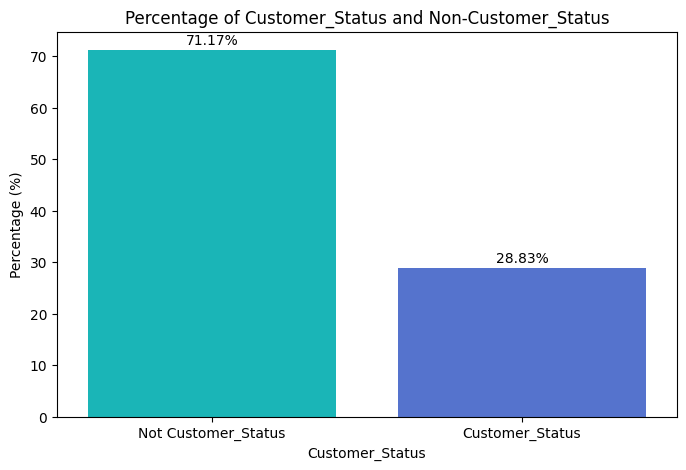

In [ ]:
# Calculating the percentage of each class
percentage = df['Customer_Status'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Customer_Status and Non-Customer_Status')
plt.xlabel('Customer_Status')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Customer_Status', 'Customer_Status'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

Imbalanced datasets can cause algorithms to become biased toward the majority class, leading to inaccurate classification of minority classes as the majority class. When trained on imbalanced data, machine learning models may produce highly skewed results. For instance, in a dataset where 76.49% of samples belong to not ad_clicked and only 23.51% to ad_clicked, the model could simply predict all inputs as not ad_clicked and achieve 76.49% accuracy, despite failing to correctly classify the minority class. Such models, trained on heavily imbalanced data, may develop an incomplete or incorrect understanding of the underlying patterns, fail to capture the distribution of values across classes, and struggle to recognize overlaps between different classes.

# Techniques to Handle Imbalanced Dataset:

The Approach to Train-Test Split:

When dealing with imbalanced datasets, it is crucial to use stratification during the train-test split. Stratification ensures that the class proportions in the training and test sets remain consistent with the original dataset. This approach is important because it provides a more accurate evaluation of the model, preventing bias caused by one class being over-represented in either the training or test set. Additionally, stratified sampling preserves any existing trends or correlations between classes in the dataset, maintaining the integrity of the data after splitting.

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Let's examine the distribution of each class in both the training and test sets.

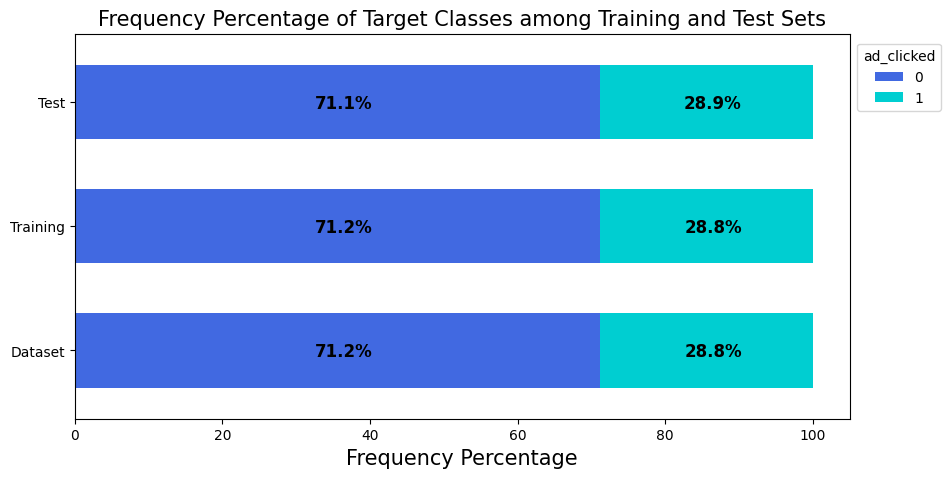

In [ ]:
# Define a dataframe containing frequency percentages
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='ad_clicked', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()

As observed, the samples are divided randomly while ensuring that the class proportions remain consistent across both the training and test sets.

# models

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:

def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest F1-score for class 1 (ad click) is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Define a colormap
    royalblue_r = LinearSegmentedColormap.from_list('royalblue_r', ['royalblue', 'white'])


    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()

# lr

Logistic Regression is a supervised machine learning algorithm commonly used for binary classification tasks. It predicts the probability of a target variable (typically binary) based on input features. The algorithm employs the logistic (sigmoid) function to transform predictions into values between 0 and 1. During training, it uses labeled data to adjust feature coefficients, aiming to reduce prediction errors and improve accuracy.

Before building our logistic regression classifier, we will use Standard Scaler to preprocess the data.

What is Standard Scaler?
Standard Scaler standardizes data by subtracting the mean and dividing by the standard deviation, ensuring that all features have a similar scale and range.

Advantages of Standard Scaling in Logistic Regression:
Faster Gradient Descent Convergence:

Logistic regression relies on gradient descent for optimization. When features have varying scales, their gradients can differ significantly, slowing convergence. Standardizing the features ensures uniform gradient magnitudes, leading to faster and more stable convergence.
Improved Regularization:

Regularization in logistic regression helps prevent overfitting. If features have different scales, those with larger values may disproportionately influence the regularization term. Standardizing the features balances their impact, improving the effectiveness of regularization.
Enhanced Model Performance:

Standardizing features can improve the model’s performance, especially when the data has skewed distributions or features with vastly different scales. Scaling ensures the model treats all features fairly and can capture patterns more effectively.


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3420
           1       0.68      0.68      0.68      1385

    accuracy                           0.82      4805
   macro avg       0.78      0.77      0.78      4805
weighted avg       0.82      0.82      0.82      4805


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       855
           1       0.70      0.68      0.69       347

    accuracy                           0.82      1202
   macro avg       0.79      0.78      0.78      1202
weighted avg       0.82      0.82      0.82      1202



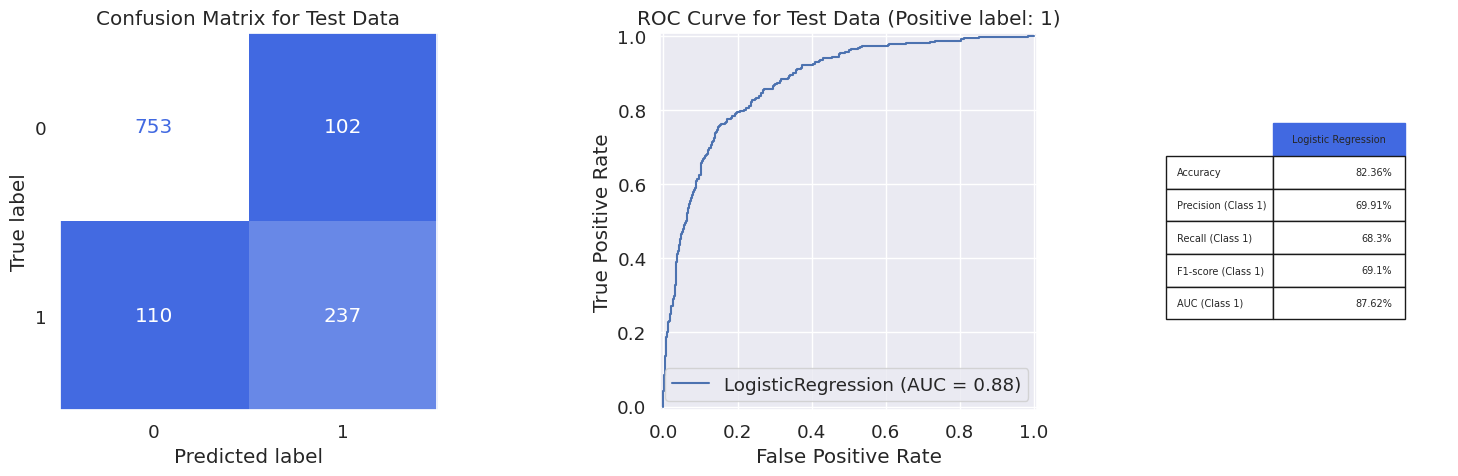

In [ ]:
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define the model
logreg_base = LogisticRegression(random_state=0, max_iter=1000)

# Define the parameter grid
param_grid_logreg = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'C': [ 0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# Call the function for hyperparameter tuning
best_logreg, best_logreg_hyperparams = tune_clf_hyperparameters(logreg_base, param_grid_logreg, X_train, y_train)
model_evaluation(best_logreg, X_train, X_test, y_train, y_test, 'Logistic Regression')

In [ ]:
# Save the final performance of LR
LR_result = metrics_calculator(best_logreg, X_test, y_test, 'LR')
LR_result

LR
Accuracy             82.36%
Precision (Class 1)  69.91%
Recall (Class 1)      68.3%
F1-score (Class 1)    69.1%
AUC (Class 1)        87.62%

# dt

In [ ]:
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 , stratify=y)


dt_base = DecisionTreeClassifier(random_state=0)

# Define the hyperparameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10],  # Increase the upper limit for deeper trees
    'min_samples_split': np.arange(2, 5),  # Start at 2 to avoid invalid splits
    'min_samples_leaf': np.arange(1, 5),
    'max_features': [None, 'sqrt'],
    'class_weight': [{0: 1, 1: w} for w in [1.0, 2.0, 3.0]]  # Add fractional weights
}
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)


DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2.0}, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      3420
           1       0.65      0.80      0.72      1385

    accuracy                           0.82      4805
   macro avg       0.78      0.81      0.79      4805
weighted avg       0.84      0.82      0.82      4805


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       855
           1       0.66      0.80      0.72       347

    accuracy                           0.82      1202
   macro avg       0.78      0.81      0.80      1202
weighted avg       0.84      0.82      0.83      1202



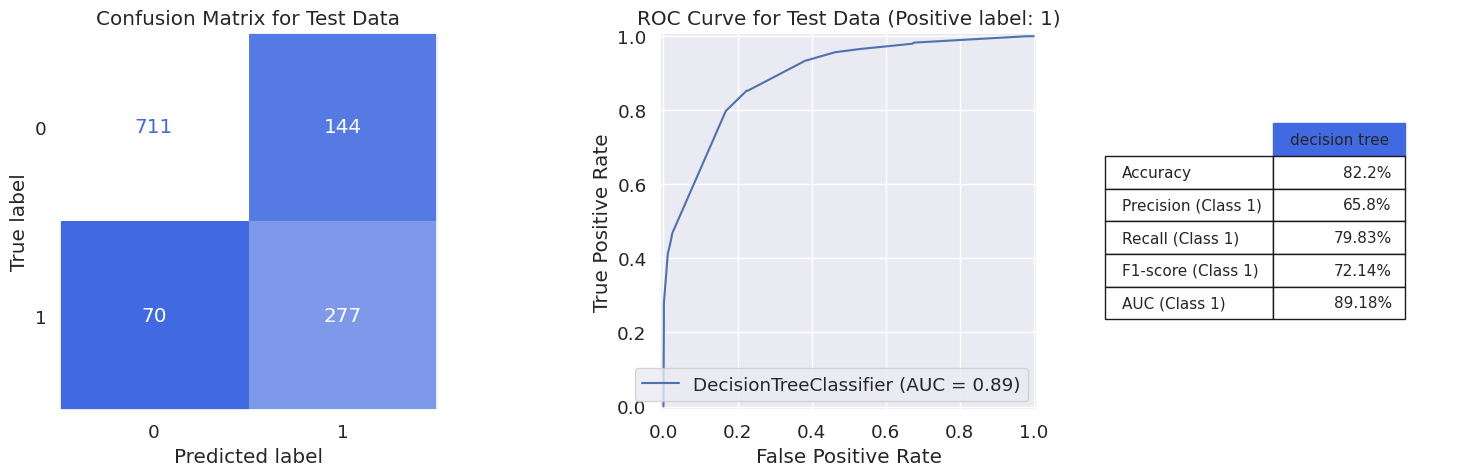

In [ ]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'decision tree')

In [ ]:
# Save the final performance of DT
dt_result = metrics_calculator(best_dt, X_test, y_test, 'DT')
dt_result

DT
Accuracy              82.2%
Precision (Class 1)   65.8%
Recall (Class 1)     79.83%
F1-score (Class 1)   72.14%
AUC (Class 1)        89.18%

# rf

Random Forest Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3420
           1       0.79      0.84      0.81      1385

    accuracy                           0.89      4805
   macro avg       0.86      0.88      0.87      4805
weighted avg       0.89      0.89      0.89      4805


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       855
           1       0.72      0.69      0.70       347

    accuracy                           0.83      1202
   macro avg       0.80      0.79      0.79      1202
w

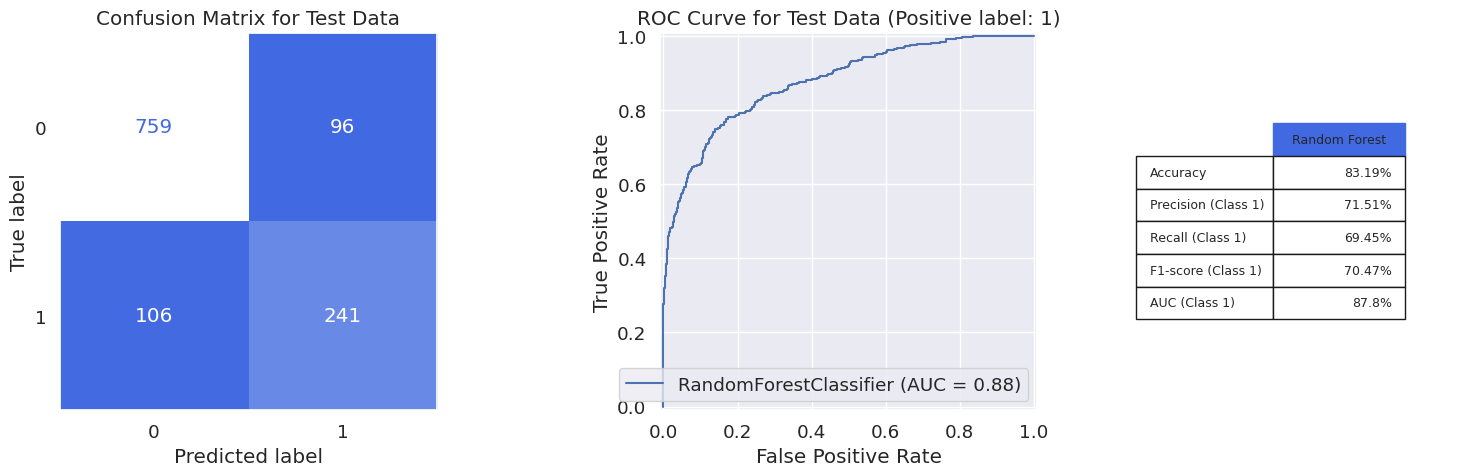

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 , stratify=y)


# Define the base Random Forest model with n_jobs for parallel processing
rf_base = RandomForestClassifier(random_state=0)

# Updated Hyperparameter grid for Random Forest with further regularization and class balancing
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['entropy'],
    'max_depth': [6,8,10],
    'min_samples_split': [4, 5],
    'min_samples_leaf': [3, 5],
    'class_weight': [{0: 1, 1: w} for w in [2,3,4]],
    'max_features': ['sqrt', 'log2']
}

# Call the function for hyperparameter tuning
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('Random Forest Optimal Hyperparameters: \n', best_rf_hyperparams)
model_evaluation(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')

In [ ]:
# Save the final performance of LR
rf_result = metrics_calculator(best_rf, X_test, y_test, 'RF')
rf_result

RF
Accuracy             83.19%
Precision (Class 1)  71.51%
Recall (Class 1)     69.45%
F1-score (Class 1)   70.47%
AUC (Class 1)         87.8%

# xgb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
%matplotlib inline

In [ ]:
!pip install --upgrade xgboost scikit-learn # Ensure xgboost and scikit-learn are updated.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 , stratify=y)

# Define the model
xgb_base = xgb.XGBClassifier(eval_metric='logloss', random_state=0, use_label_encoder=False) # Setting use_label_encoder to False for newer XGBoost versions.


In [ ]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [250, 350],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7, 8],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [ ]:
# Call the function for hyperparameter tuning
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 250, 'scale_pos_weight': 3.2551724137931033, 'subsample': 0.7}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1416
           1       0.61      0.89      0.72       435

    accuracy                           0.84      1851
   macro avg       0.78      0.86      0.80      1851
weighted avg       0.88      0.84      0.85      1851


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       354
           1       0.37      0.52      0.43       109

    accuracy                           0.68       463
   macro avg       0.60      0.62      0.60       463
weighted avg       0.72      0.68      0.69       463



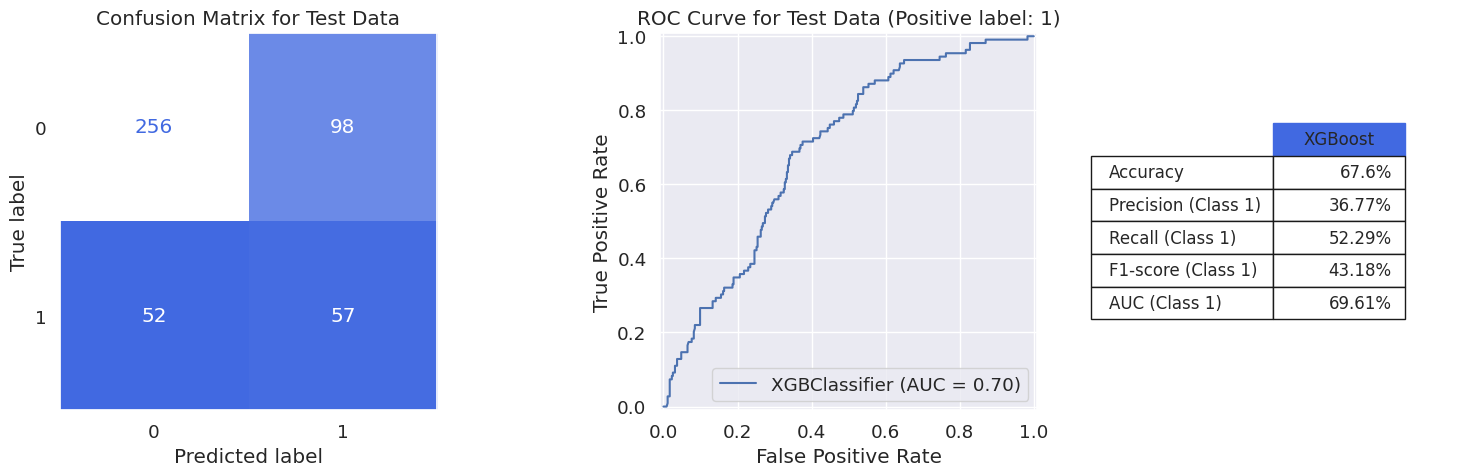

In [ ]:
model_evaluation(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

In [ ]:
# Save the final performance of LR
xgb_result = metrics_calculator(best_xgb, X_test, y_test, 'xgb')
xgb_result

xgb
Accuracy             72.48%
Precision (Class 1)  42.97%
Recall (Class 1)     53.92%
F1-score (Class 1)   47.83%
AUC (Class 1)        72.87%

In [ ]:
# Define the model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [150, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [4, 5, 6],
    'subsample': [0.5, 0.6],
    'colsample_bytree': [0.6, 0.7],
    'scale_pos_weight': [2, 3],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [1, 10]
}

# Call the function for hyperparameter tuning
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)

In [ ]:
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 10, 'scale_pos_weight': 3, 'subsample': 0.6}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      1416
           1       0.41      0.70      0.52       435

    accuracy                           0.70      1851
   macro avg       0.65      0.70      0.65      1851
weighted avg       0.77      0.70      0.72      1851


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       354
           1       0.36      0.61      0.45       109

    accuracy                           0.65       463
   macro avg       0.60      0.64      0.60       463
weighted avg       0.73      0.65      0.68       463



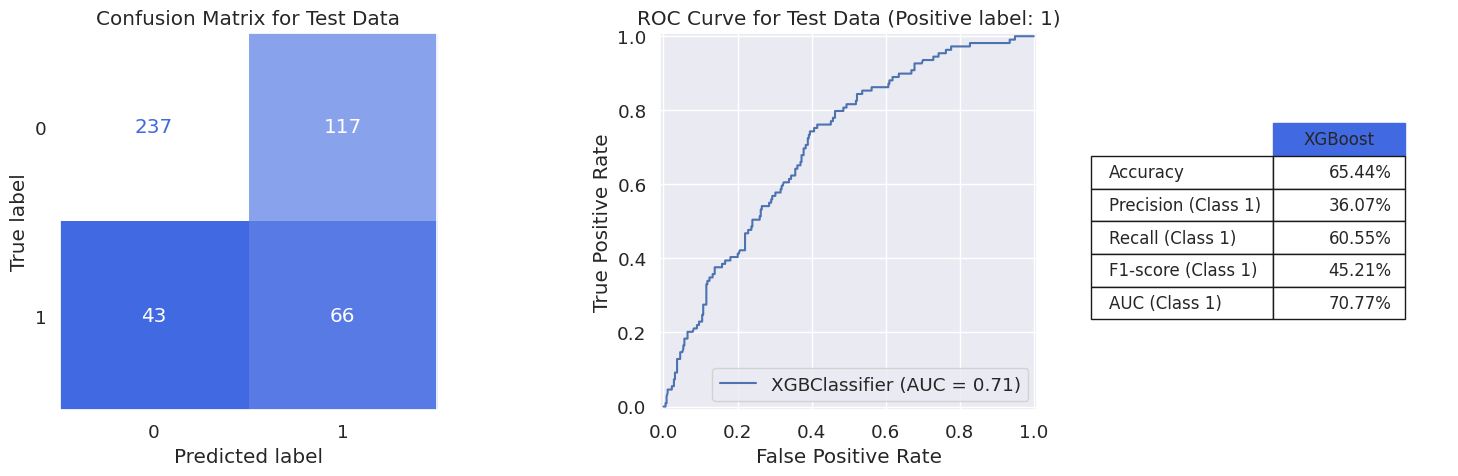

In [ ]:
model_evaluation(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

Confusion Matrix:
[[789  66]
 [123 224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       855
           1       0.77      0.65      0.70       347

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



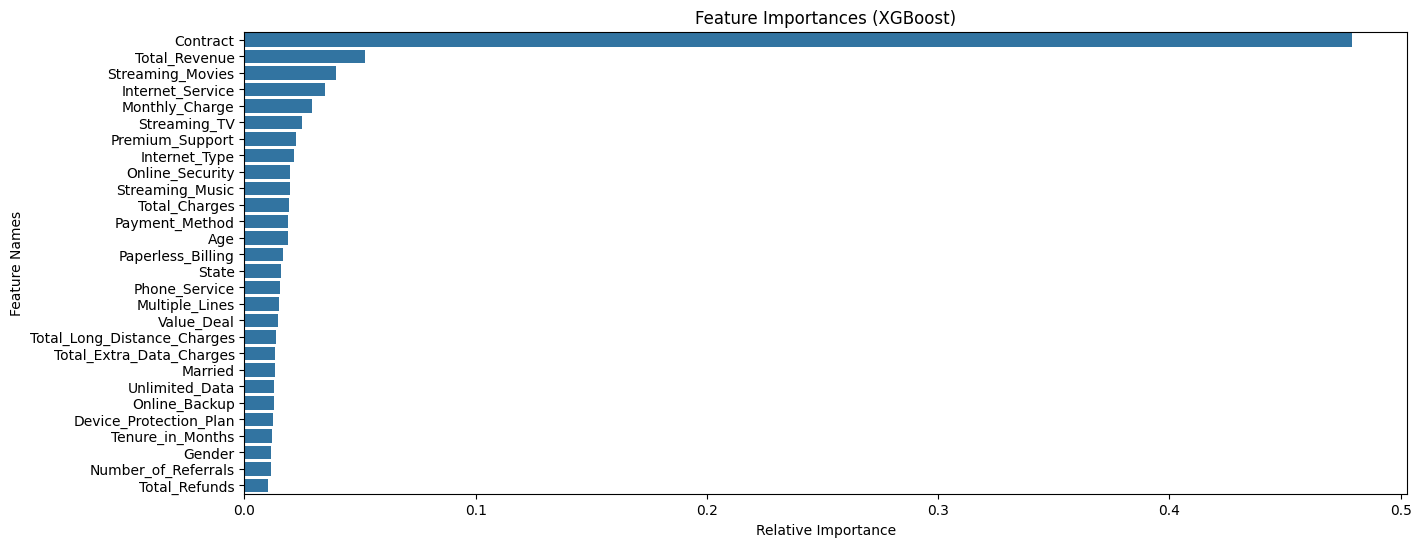

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 , stratify=y)

# Initialize the XGBoost Classifier
best_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
best_xgb.fit(X_train, y_train)

# Evaluate Model
# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances (XGBoost)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [ ]:
# Save the final performance of LR
xgb_result = metrics_calculator(best_xgb, X_test, y_test, 'xgb')
xgb_result

xgb
Accuracy             84.28%
Precision (Class 1)  77.24%
Recall (Class 1)     64.55%
F1-score (Class 1)   70.33%
AUC (Class 1)        88.27%

# ada

AdaBoostClassifier Optimal Hyperparameters: 
 {'estimator__class_weight': 'balanced', 'estimator__max_depth': 3, 'estimator__max_features': 'sqrt', 'learning_rate': 0.1, 'n_estimators': 50}

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      3420
           1       0.62      0.85      0.71      1385

    accuracy                           0.81      4805
   macro avg       0.77      0.82      0.78      4805
weighted avg       0.84      0.81      0.81      4805


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       855
           1       0.61      0.85      0.71       347

    accuracy                           0.80      1202
   macro avg       0.77      0.81      0.78      1202
weighted avg    

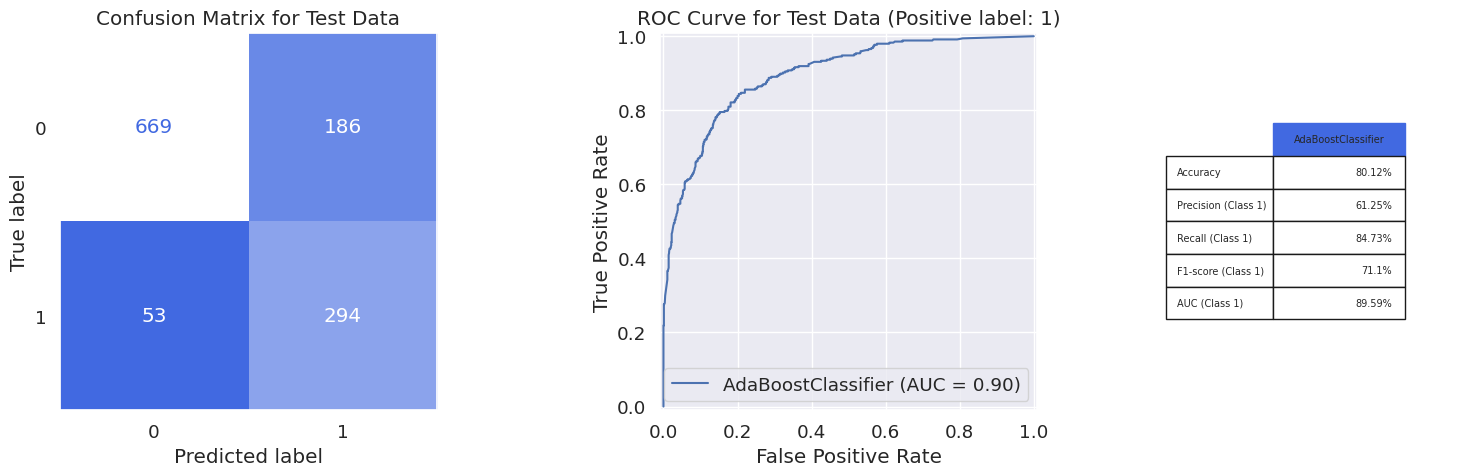

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
# Split the data
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

# Define the model
# Pass the base estimator as the first argument, not as a keyword argument.
adaboost_base = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'), random_state=0)

# Define the parameter grid
# Use 'estimator' instead of 'base_estimator' for base estimator parameters
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3],  # Changed 'base_estimator' to 'estimator'
    'estimator__max_features': ['sqrt', 'log2'],  # Changed 'base_estimator' to 'estimator'
    'estimator__class_weight': ['balanced']  # Changed 'base_estimator' to 'estimator'
}

# Call the function for hyperparameter tuning
best_adaboost, best_adaboost_hyperparams = tune_clf_hyperparameters(adaboost_base, param_grid_adaboost, X_train, y_train)
print('AdaBoostClassifier Optimal Hyperparameters: \n', best_adaboost_hyperparams)
model_evaluation(best_adaboost, X_train, X_test, y_train, y_test, 'AdaBoostClassifier')

In [ ]:
# Save the final performance of LR
ada_result = metrics_calculator(best_adaboost, X_test, y_test, 'Adaboost')
ada_result

Adaboost
Accuracy              80.12%
Precision (Class 1)   61.25%
Recall (Class 1)      84.73%
F1-score (Class 1)     71.1%
AUC (Class 1)         89.59%

In [ ]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([LR_result,dt_result,xgb_result,rf_result,ada_result], axis=1).T

# Reset the index to ensure unique index values
results.reset_index(inplace=True) # Added this line to reset the index

#Check for and drop any duplicate columns
results = results.loc[:,~results.columns.duplicated()] #Added this line to remove duplicate columns if any

# Rename the index column to 'Model' or any other desired name
results.index.name = 'Model' # Added this line to rename the index column


# Sort the dataframe in descending order based on F1-score (class 1) values
results.sort_values(by='F1-score (Class 1)', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score (Class 1)')

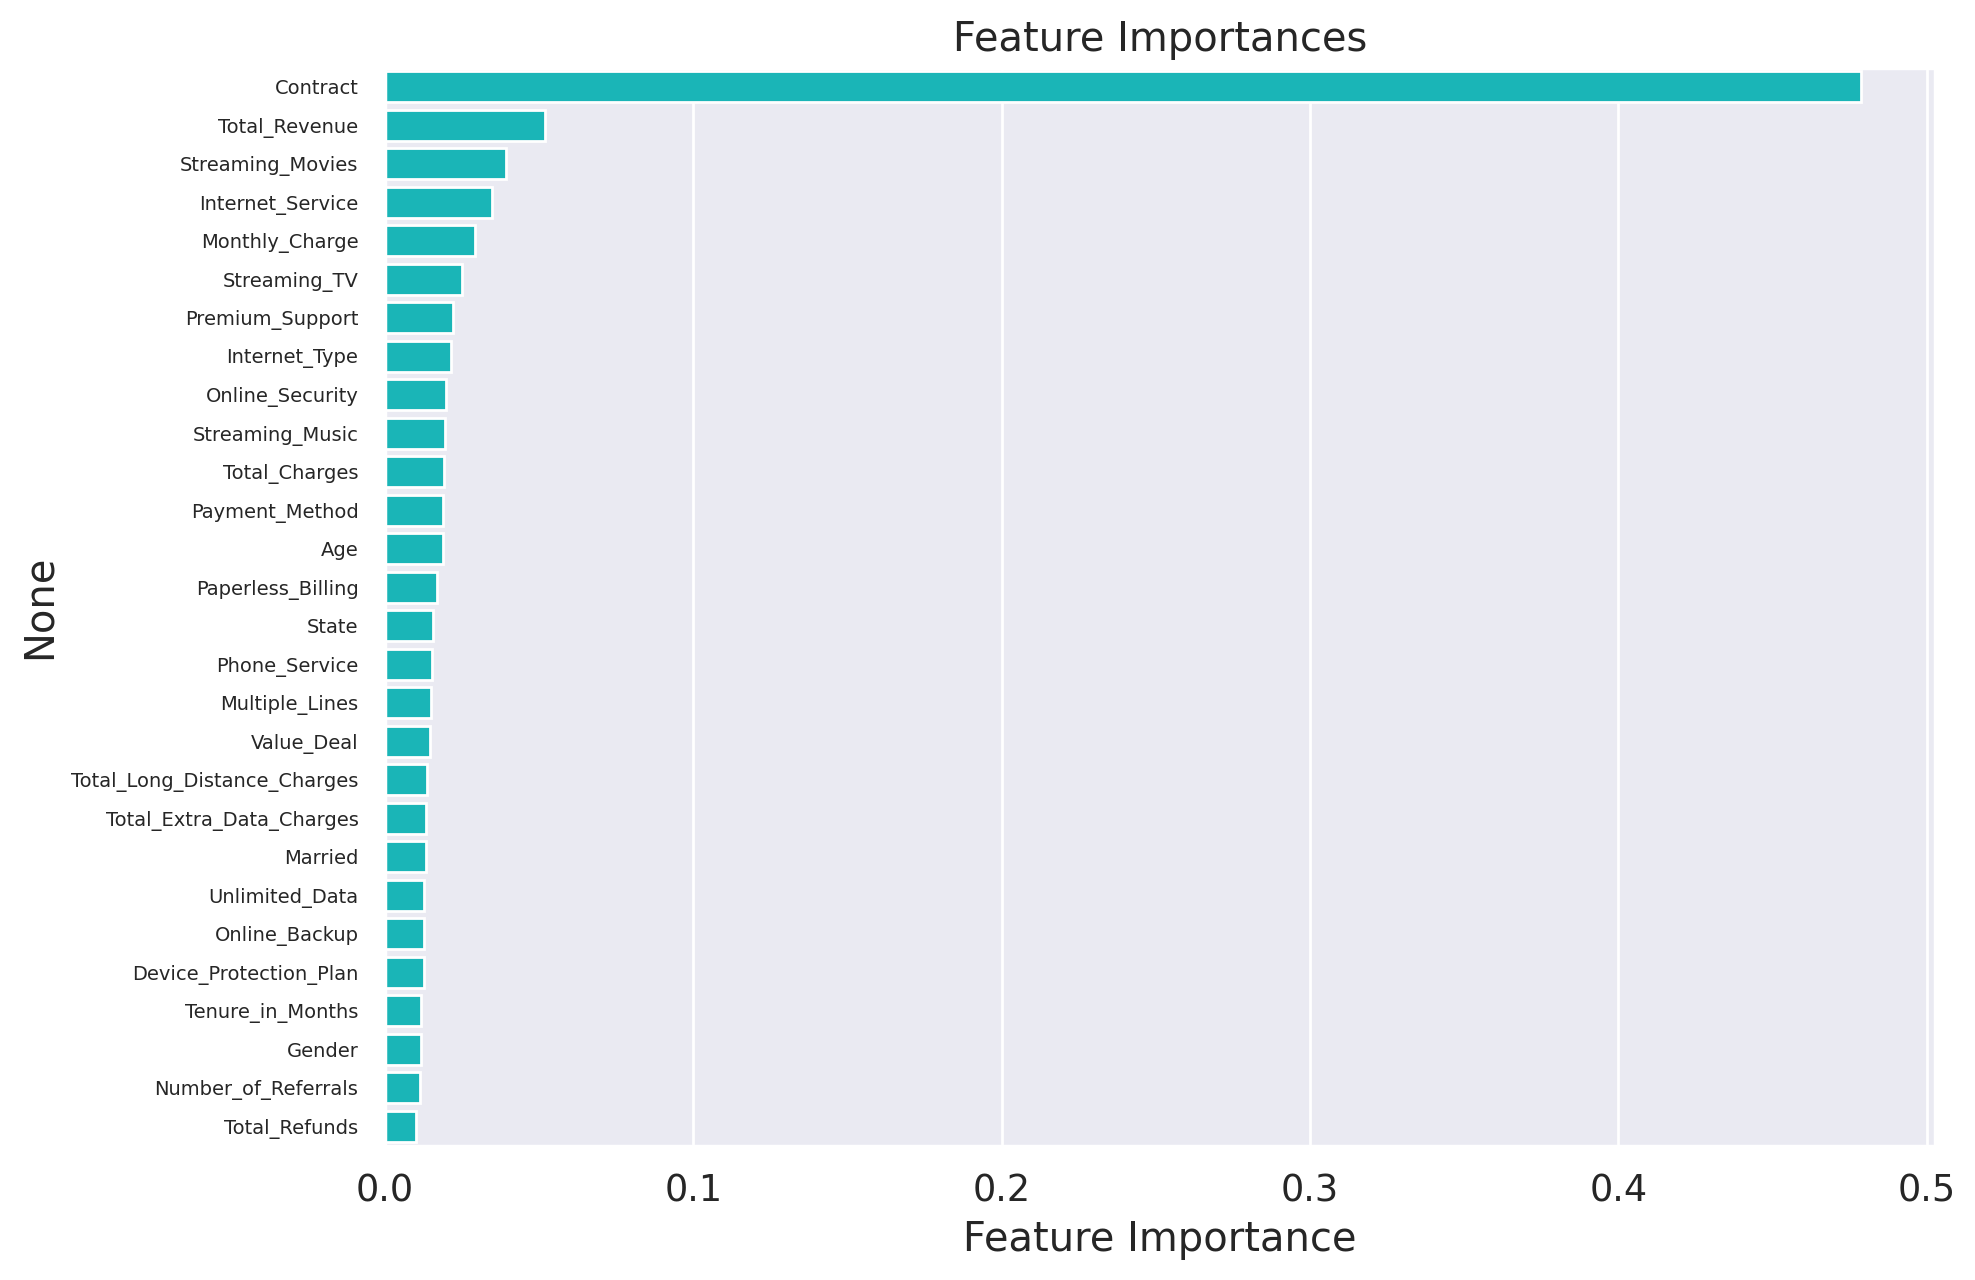

In [ ]:
# Compute feature importances
feature_importances = best_xgb.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

In [ ]:
# Define the path to the Joiner Data Excel file
file_path = 'Customer_Data1.xlsx'
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = best_xgb.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\Users\parha\Documents\Data_Analysis_projects\churn_full\Data & Resources\Data\Prediction.csv", index=False)


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines Internet_Service  \
0                27        NaN           Yes             No              Yes   
1                13        NaN           Yes            Yes              Yes   
2                35     Deal 5           Yes             No              Yes   
3                21     Deal 4           Yes             No              Yes   
4                 8        NaN           Yes             No              Yes   

  Internet_Type Online_Security Online_Backup Device_Protection_Plan  \
0         Cabl

In [ ]:
# Define the path to the Joiner Data Excel file
file_path = r"/content/predict_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'churn_data'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = best_xgb.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"/content/Predictions.csv", index=False)


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines Internet_Service  \
0                31     Deal 1           Yes             No              Yes   
1                 9     Deal 5           Yes             No              Yes   
2                28     Deal 1           Yes            Yes              Yes   
3                12        NaN           Yes             No              Yes   
4                27     Deal 2           Yes             No              Yes   

  Internet_Type Online_Security Online_Backup Device_Protection_Plan